**<div style="border:15px solid green; padding: 12px; font-size: 15px;">**
## <span style='color:red;'>  **PROJET DE PYTHON POUR L'ANNÉE ACCADÉMIQUE 2023-2024**</span>
## <span style='color:red;'>NOM DU PARTICIPANT</span>:   **AFADONOU KOKOUVI**
## <span style='color:red;'>PARCOURS</span>:    **CEPOPP**
## <span style='color:red;'>NOM DE L'ENSEIGNANT</span>:    **ALEXANDRE WAREMBOURG** </div>




****
## ***<span style='color:green;'> Notre projet vise à analyser les tendances et les facteurs de risque associés aux accidents de la circulation lies aux vehicules de type 1 impliquant des piétons et des cyclistes dans les divers arrondissements. Ensuite, nous développerons un modèle permettant de prédire si le fait d'emprunter une rue à des heures spécifiques, un jour donné de la semaine et pendant un mois particulier accroît le risque d'accident </span>***.
****

#### Importation des packages nécessaires pour la manipulation des données

In [163]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import MissingIndicator, KNNImputer,SimpleImputer
from sklearn.impute import IterativeImputer

## **I** **<span style='color:blue;'>**Importation des deux jeux de données qui feront l'objet de notre analyse**</span>**

In [164]:
collision_type = pd.read_csv(r"C:\Users\pc\Desktop\collision_type.csv", sep ="|")
person_crash = pd.read_csv(r"C:\Users\pc\Desktop\person_crash.csv", sep = "|")

C:\Users\pc\AppData\Local\Temp\ipykernel_3132\1692856231.py:2: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  person_crash = pd.read_csv(r"C:\Users\pc\Desktop\person_crash.csv", sep = "|")


## Détail du nom des variables dans le jeu de donnée person_crash

1.  **crash_date** : La date à laquelle l'accident s'est produit.
2. **crash_time**: L'heure à laquelle l'accident s'est produit.
3. **on_street_name**: Le nom de la rue où l'accident s'est produit.
4. **off_street_name**: Le nom de la rue adjacente où l'accident s'est produit, s'il y en a une.
5. **number_of_persons_injured**: Le nombre total de personnes blessées dans l'accident.
6. **number_of_persons_killed**: Le nombre total de personnes tuées dans l'accident.
7. **number_of_pedestrians_injured**: Le nombre de piétons blessés dans l'accident.
8. **number_of_pedestrians_killed**: Le nombre de piétons tués dans l'accident.
9. **number_of_cyclist_injured**: Le nombre de cyclistes blessés dans l'accident.
10. **number_of_cyclist_killed**: Le nombre de cyclistes tués dans l'accident.
11. **number_of_motorist_injured**: Le nombre de conducteurs blessés dans l'accident.
12. **number_of_motorist_killed**: Le nombre de conducteurs tués dans l'accident.
13. **collision_id**: L'identifiant unique de la collision.
14. **borough**: Le quartier de la ville où l'accident s'est produit.
15. **zip_code**: Le code postal de la zone où l'accident s'est produit.
16. **latitude**: La latitude de l'emplacement de l'accident.
17. **longitude**: La longitude de l'emplacement de l'accident.
18. **location**: La localisation précise de l'accident.
19. **cross_street_name**: Le nom de la rue transversale où l'accident s'est produit.

## Détail du nom des variables dans le jeu de données collision_type

1. **crash_date** : La date à laquelle l'accident s'est produit.
2. **crash_time** : L'heure à laquelle l'accident s'est produit.
3. **collision_id** : L'identifiant unique de la collision.
4. **vehicle_type_code1** : Le code du type de véhicule impliqué dans l'accident (premier véhicule).
5. **vehicle_type_code2** : Le code du type de véhicule impliqué dans l'accident (deuxième véhicule).
6. **vehicle_type_code_3** : Le code du type de véhicule impliqué dans l'accident (troisième véhicule, le cas échéant).
7. **vehicle_type_code_4** : Le code du type de véhicule impliqué dans l'accident (quatrième véhicule, le cas échéant).
8. **vehicle_type_code_5** : Le code du type de véhicule impliqué dans l'accident (cinquième véhicule, le cas échéant).
9. **contributing_factor_vehicle_1** : Le facteur contributif principal à l'accident pour le premier véhicule impliqué.
10. **contributing_factor_vehicle_2** : Le facteur contributif principal à l'accident pour le deuxième véhicule impliqué.
11. **contributing_factor_vehicle_3** : Le facteur contributif principal à l'accident pour le troisième véhicule impliqué.
12. **contributing_factor_vehicle_4** : Le facteur contributif principal à l'accident pour le quatrième véhicule impliqué.
13. **contributing_factor_vehicle_5** : Le facteur contributif principal à l'accident pour le cinquième véhicule impliqué.

## **I-1.** **<span style='color:blue;'>**Inspection des deux jeux de données**</span>**

In [165]:
collision_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 14 columns):
 #   Column                         Dtype 
---  ------                         ----- 
 0   Unnamed: 0                     int64 
 1   crash_date                     object
 2   crash_time                     object
 3   collision_id                   int64 
 4   vehicle_type_code1             object
 5   vehicle_type_code2             object
 6   vehicle_type_code_3            object
 7   vehicle_type_code_4            object
 8   vehicle_type_code_5            object
 9   contributing_factor_vehicle_1  object
 10  contributing_factor_vehicle_2  object
 11  contributing_factor_vehicle_3  object
 12  contributing_factor_vehicle_4  object
 13  contributing_factor_vehicle_5  object
dtypes: int64(2), object(12)
memory usage: 213.6+ MB


##### Dans notre ensemble de données sur les types de collisions, une enquête a été menée auprès de 2 000 000 d'individus, avec 14 variables comprenant 2 variables quantitatives et 12 variables qualitatives. Ce jeu de données occupe une mémoire de 213,6 mégabits.

In [166]:
person_crash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 20 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   Unnamed: 0                     int64  
 1   crash_date                     object 
 2   crash_time                     object 
 3   on_street_name                 object 
 4   off_street_name                object 
 5   number_of_persons_injured      float64
 6   number_of_persons_killed       float64
 7   number_of_pedestrians_injured  int64  
 8   number_of_pedestrians_killed   int64  
 9   number_of_cyclist_injured      int64  
 10  number_of_cyclist_killed       int64  
 11  number_of_motorist_injured     int64  
 12  number_of_motorist_killed      int64  
 13  collision_id                   int64  
 14  borough                        object 
 15  zip_code                       object 
 16  latitude                       float64
 17  longitude                      float64
 18  lo

##### Dans notre jeu de données portant sur les personnes accidentées, une enquête a été menée auprès de 2 000 000 d'individus, comprenant 20 variables dont 12 sont des variables quantitatives et 8 sont des variables qualitatives. Ce jeu de données occupe une mémoire de 305,2 mégaoctets.

### **I-2**  **<span style='color:blue;'>**Visualisation des valeurs manquantes et voir s'il y a des possibilités de les traiter avec les différentes méthodes vues aux cours**</span>**

In [167]:
person_crash.isnull().sum()/(len(person_crash))*100

Unnamed: 0                        0.00000
crash_date                        0.00000
crash_time                        0.00000
on_street_name                   20.97965
off_street_name                  37.28745
number_of_persons_injured         0.00090
number_of_persons_killed          0.00155
number_of_pedestrians_injured     0.00000
number_of_pedestrians_killed      0.00000
number_of_cyclist_injured         0.00000
number_of_cyclist_killed          0.00000
number_of_motorist_injured        0.00000
number_of_motorist_killed         0.00000
collision_id                      0.00000
borough                          31.09410
zip_code                         31.10600
latitude                         11.41525
longitude                        11.41525
location                         11.41525
cross_street_name                83.63900
dtype: float64

In [168]:
# Visualiser les valeurs manquantes  pour la base collision_type
collision_type.isnull().sum()/(len(collision_type))*100

Unnamed: 0                        0.00000
crash_date                        0.00000
crash_time                        0.00000
collision_id                      0.00000
vehicle_type_code1                0.62245
vehicle_type_code2               18.55585
vehicle_type_code_3              93.17940
vehicle_type_code_4              98.47195
vehicle_type_code_5              99.58695
contributing_factor_vehicle_1     0.31305
contributing_factor_vehicle_2    15.19765
contributing_factor_vehicle_3    92.93620
contributing_factor_vehicle_4    98.41985
contributing_factor_vehicle_5    99.57450
dtype: float64

## **I-3**. **<span style='color:blue;'>**Sélection des variables pour faire notre analyse; dans le jeu de données collision_type, nous allons éliminer la colonne des vehicules 3; 4 et 5 car elles presentent plus de 80% des valeurs manquantes**</span>**

In [169]:
# Séléction des variables dans le jeu de donnée "collision_type"
collision_type = collision_type[["crash_date","crash_time","collision_id","vehicle_type_code1","contributing_factor_vehicle_1"]]
# Convertissons la colonne "carsh_date" en type de données datetime
collision_type["crash_date"] = pd.to_datetime(collision_type["crash_date"])
collision_type.head()

,crash_date,crash_time,collision_id,vehicle_type_code1,contributing_factor_vehicle_1
0,2021-09-11,2:39,4455765,Sedan,Aggressive Driving/Road Rage
1,2022-03-26,11:45,4513547,Sedan,Pavement Slippery
2,2022-06-29,6:55,4541903,Sedan,Following Too Closely
3,2021-09-11,9:35,4456314,Sedan,Unspecified
4,2021-12-14,8:13,4486609,NaN,NaN


In [170]:
# Séléction des variables dans le jeu de donnée "person_crash"
person_crash = person_crash[["crash_date","collision_id","crash_time","on_street_name","number_of_persons_injured","number_of_persons_killed",
"number_of_pedestrians_injured","number_of_pedestrians_killed","number_of_cyclist_injured","number_of_cyclist_killed","number_of_motorist_injured",
"number_of_motorist_killed","borough","latitude","longitude","location"]] 


In [171]:
# Convertissons la colonne "carsh_date" en type de données datetime
person_crash["crash_date"] = pd.to_datetime(person_crash["crash_date"])
person_crash.head()

,crash_date,collision_id,crash_time,on_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,borough,latitude,longitude,location
0,2021-09-11,4455765,2:39,WHITESTONE EXPRESSWAY,2.0,0.0,0,0,0,0,2,0,NaN,NaN,NaN,NaN
1,2022-03-26,4513547,11:45,QUEENSBORO BRIDGE UPPER,1.0,0.0,0,0,0,0,1,0,NaN,NaN,NaN,NaN
2,2022-06-29,4541903,6:55,THROGS NECK BRIDGE,0.0,0.0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
3,2021-09-11,4456314,9:35,NaN,0.0,0.0,0,0,0,0,0,0,BROOKLYN,40.667202,-73.866500,"{'latitude': '40.667202', 'longitude': '-73.86..."
4,2021-12-14,4486609,8:13,SARATOGA AVENUE,0.0,0.0,0,0,0,0,0,0,BROOKLYN,40.683304,-73.917274,"{'latitude': '40.683304', 'longitude': '-73.91..."


## **I-4**. **<span style='color:blue;'>**Traitement des données manquantes dans le jeu de données "collision_type"**</span>**

En examinant la valeur des données manquantes dans l'ensemble de données "collision_type", nous sommes en mesure de remédier aux lacunes observées dans les colonnes "vehicle_type_code1", "contributing_factor_vehicle_1",'vehicle_type_code2',
'contributing_factor_vehicle_2' en appliquant la méthode de propagation de la dernière valeur observée. Cette décision repose sur l'hypothèse selon laquelle, en cas d'accident à un moment donné et en un endroit spécifique, la probabilité que celui-ci se produise à ce même moment est significative.

In [172]:
# Imputation des valeurs manquantes pour vehicle_type_code1 et contributing_factor_vehicle_1 par une valeur la plus proche
collision_type['vehicle_type_code1'].fillna(method='ffill', inplace=True)
collision_type['contributing_factor_vehicle_1'].fillna(method='ffill', inplace=True)


# Vérification des valeurs manquantes après l'imputation
print(collision_type.isnull().sum())


C:\Users\pc\AppData\Local\Temp\ipykernel_3132\1647310346.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  collision_type['vehicle_type_code1'].fillna(method='ffill', inplace=True)
C:\Users\pc\AppData\Local\Temp\ipykernel_3132\1647310346.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  collision_type['contributing_factor_vehicle_1'].fillna(method='ffill', inplace=True)


crash_date                       0
crash_time                       0
collision_id                     0
vehicle_type_code1               0
contributing_factor_vehicle_1    0
dtype: int64


#### **I-4-1**. **<span style='color:blue;'>**Dans l'ensemble du jeu de données "person_crash", nous envisageons appliquer la méthode d'imputation des valeurs manquantes par la methode forward fill pour les valeurs numeriques et par inconnu les valeurs categorielles**</span>**

In [173]:
from sklearn.impute import SimpleImputer

# Imputation pour les variables numériques (par la methode ffill)
numeric_columns = ['number_of_persons_injured', 'number_of_persons_killed', 'latitude', 'longitude']

person_crash[numeric_columns] = person_crash[numeric_columns].fillna(method='ffill')

print(person_crash.isnull().sum())


C:\Users\pc\AppData\Local\Temp\ipykernel_3132\3531823866.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  person_crash[numeric_columns] = person_crash[numeric_columns].fillna(method='ffill')


crash_date                            0
collision_id                          0
crash_time                            0
on_street_name                   419593
number_of_persons_injured             0
number_of_persons_killed              0
number_of_pedestrians_injured         0
number_of_pedestrians_killed          0
number_of_cyclist_injured             0
number_of_cyclist_killed              0
number_of_motorist_injured            0
number_of_motorist_killed             0
borough                          621882
latitude                              3
longitude                             3
location                         228305
dtype: int64


In [174]:

# Remplacement des valeurs manquantes par 'Unknown' pour les variables catégorielles
categorical_columns = ['borough', 'on_street_name', 'location']
person_crash[categorical_columns] = person_crash[categorical_columns].fillna('Unknown')

# Vérification des valeurs manquantes après l'imputation
print("\nValeurs manquantes après imputation :")
print(person_crash.isnull().sum())


Valeurs manquantes après imputation :
crash_date                       0
collision_id                     0
crash_time                       0
on_street_name                   0
number_of_persons_injured        0
number_of_persons_killed         0
number_of_pedestrians_injured    0
number_of_pedestrians_killed     0
number_of_cyclist_injured        0
number_of_cyclist_killed         0
number_of_motorist_injured       0
number_of_motorist_killed        0
borough                          0
latitude                         3
longitude                        3
location                         0
dtype: int64


##  **I-4-2**. **<span style='color:blue;'>**Nous allons supprimer les NAS dans les colonnes Latitude et longitude car leurs pourcentage restent insignifiant dans notre jeu de donnee**</span>**

In [175]:
person_crash.dropna(subset=['longitude', 'latitude'], inplace=True)

In [176]:
person_crash.isnull().sum()

crash_date                       0
collision_id                     0
crash_time                       0
on_street_name                   0
number_of_persons_injured        0
number_of_persons_killed         0
number_of_pedestrians_injured    0
number_of_pedestrians_killed     0
number_of_cyclist_injured        0
number_of_cyclist_killed         0
number_of_motorist_injured       0
number_of_motorist_killed        0
borough                          0
latitude                         0
longitude                        0
location                         0
dtype: int64

## **I-5**. **<span style='color:blue;'>**Fusion des deux bases de données et qui sera nommée accident_data**</span>**

In [177]:
# Fusion des DataFrames sur les colonnes crash_date et crash_time
accident_data = pd.merge(person_crash, collision_type, on=['crash_date', 'crash_time','collision_id'], how= 'inner')

# Vérification des valeurs manquantes après la fusion
print("\nValeurs manquantes après fusion :")
print(accident_data.isnull().sum())



Valeurs manquantes après fusion :
crash_date                       0
collision_id                     0
crash_time                       0
on_street_name                   0
number_of_persons_injured        0
number_of_persons_killed         0
number_of_pedestrians_injured    0
number_of_pedestrians_killed     0
number_of_cyclist_injured        0
number_of_cyclist_killed         0
number_of_motorist_injured       0
number_of_motorist_killed        0
borough                          0
latitude                         0
longitude                        0
location                         0
vehicle_type_code1               0
contributing_factor_vehicle_1    0
dtype: int64


## Informations sur les données

In [178]:
accident_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999997 entries, 0 to 1999996
Data columns (total 18 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   crash_date                     datetime64[ns]
 1   collision_id                   int64         
 2   crash_time                     object        
 3   on_street_name                 object        
 4   number_of_persons_injured      float64       
 5   number_of_persons_killed       float64       
 6   number_of_pedestrians_injured  int64         
 7   number_of_pedestrians_killed   int64         
 8   number_of_cyclist_injured      int64         
 9   number_of_cyclist_killed       int64         
 10  number_of_motorist_injured     int64         
 11  number_of_motorist_killed      int64         
 12  borough                        object        
 13  latitude                       float64       
 14  longitude                      float64       
 15  location       

Cette base de données contient des informations importantes pour comprendre les accidents de la circulation. Les variables telles que la date et l'heure de l'accident, les types de véhicules impliqués, les facteurs contributifs, le lieu de l'accident, le nombre de victimes, l'arrondissement et les coordonnées géographiques offrent une vue complète de chaque incident. En tant que data scientist, l'analyse de ces données nous permettrait d'identifier les tendances temporelles et spatiales des accidents, d'identifier les facteurs de risque les plus préoccupants, et de proposer des interventions ciblées pour améliorer la sécurité routière

In [179]:
accident_data.duplicated().sum()

0

## Nous n'avons pas de doublons dans notre base de donnee

#  **II**  **<span style='color:blue;'> LA STATISTIQUE DESCRIPTIVE </span>** (**<span style='color:blue;'> ANALYSE UNIVARIEE </span>**)

In [180]:
# Sélection des variables qualitatives
qualitative_variables = accident_data.select_dtypes(include='object')

# Affichage des statistiques descriptives
qualitative_variables.describe()

,crash_time,on_street_name,borough,location,vehicle_type_code1,contributing_factor_vehicle_1
count,1999997,1999997,1999997,1999997,1999997,1999997
unique,1440,17855,6,312342,1525,61
top,16:00,Unknown,Unknown,Unknown,Sedan,Unspecified
freq,27753,419593,621879,228302,547215,690407


Dans notre analyse des données sur les accidents, nous avons examiné plusieurs aspects pour mieux comprendre les schémas et les tendances. Voici ce que nous avons découvert :

L'heure à laquelle les accidents se produisent varie tout au long de la journée, avec des enregistrements pour chaque minute sur une période de 24 heures.

Nous avons répertorié un total de 17 855 rues différentes mentionnées dans nos données. Cependant, le terme "Unknown" apparaît le plus souvent, ce qui suggère qu'un nombre significatif d'accidents se produisent dans des endroits non spécifiés.

Concernant les arrondissements où les accidents se produisent, nous avons identifié 6 arrondissements différents dans nos données.

Nous avons également répertorié 1 525 types de véhicules différents impliqués dans les accidents. Le type de véhicule le plus courant est la "Sedan", présente dans 547 215 accidents. Cela pourrait refléter la popularité de ce type de véhicule ou son utilisation généralisée dans la région.

En ce qui concerne les facteurs contributifs aux accidents, nous avons identifié 61 facteurs différents. Le facteur le plus fréquent est "Unspecified", présent dans 690 407 enregistrements. Cela souligne l'importance de comprendre les circonstances exactes des accidents pour prévenir les futurs incidents.

## ***Statistiques descriptives pour les variables quantitatives (numériques)*** 

In [181]:
# Sélection des variables quantitatives
quantitative_variables = accident_data.select_dtypes(include=['int64', 'float64'])

# Affichage des statistiques descriptives
quantitative_variables.describe()

,collision_id,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,latitude,longitude
count,1.999997e+06,1.999997e+06,1.999997e+06,1.999997e+06,1.999997e+06,1.999997e+06,1.999997e+06,1.999997e+06,1.999997e+06,1.999997e+06,1.999997e+06
mean,3.102944e+06,3.004425e-01,1.433002e-03,5.497208e-02,7.175011e-04,2.593104e-02,1.090002e-04,2.165758e-01,5.880009e-04,4.062960e+01,-7.375552e+01
std,1.504151e+06,6.912434e-01,3.987417e-02,2.408738e-01,2.727612e-02,1.608684e-01,1.048753e-02,6.523614e-01,2.641317e-02,1.962136e+00,3.692632e+00
min,2.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.013600e+02
25%,3.136119e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.066803e+01,-7.397514e+01
50%,3.636220e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.072131e+01,-7.392762e+01
75%,4.136472e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.076932e+01,-7.386669e+01
max,4.700832e+06,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00,4.334444e+01,0.000000e+00


En moyenne, chaque accident entraîne des blessures pour environ un tiers d'une personne, ce qui équivaut à environ une blessure pour chaque troisième accident.
Le nombre de décès est extrêmement faible, avec environ une personne tuée pour chaque 700 accidents, soit environ une personne sur mille.
Environ 5 piétons sont blessés pour chaque 100 accidents, tandis qu'un piéton est tué pour chaque 1 400 accidents.
Les accidents impliquant des cyclistes sont moins fréquents, avec environ un cycliste blessé pour chaque 30 accidents, et un cycliste tué pour chaque 10 000 accidents.
Les automobilistes représentent la grande majorité des blessés, avec environ 2 personnes blessées pour chaque accident, et environ une personne tuée pour chaque 1 500 accidents.

##  ***Nombre de piétons et de cyclistes impliqués dans les accidents***

In [182]:
# Nombre de piétons impliqués
pietons_impliques = accident_data['number_of_pedestrians_injured'] + accident_data['number_of_pedestrians_killed']
# Nombre total de piétons impliqués dans les accidents
total_pietons = pietons_impliques.sum()

# Nombre de cyclistes impliqués
cyclistes_impliques = accident_data['number_of_cyclist_injured'] + accident_data['number_of_cyclist_killed']
# Nombre total de cyclistes impliqués dans les accidents
total_cyclistes = cyclistes_impliques.sum()

# Nombre de motocyclistes impliqués
motoristes_impliques = accident_data['number_of_motorist_injured'] + accident_data['number_of_motorist_killed']
# Nombre total de motoristes impliqués dans les accidents
total_motoristes = motoristes_impliques.sum()

print("Nombre total de piétons impliqués dans les accidents : ", total_pietons)
print("Nombre total de cyclistes impliqués dans les accidents : ", total_cyclistes)
print("Nombre total de motoristes impliqués dans les accidents : ", total_motoristes)

Nombre total de piétons impliqués dans les accidents :  111379
Nombre total de cyclistes impliqués dans les accidents :  52080
Nombre total de motoristes impliqués dans les accidents :  434327


Sur l'ensemble des accidents enregistrés, environ 111 379 impliquent des piétons représentant environ 5,57% de tous les accidents. Cela représente un nombre significatif de situations où des personnes se déplaçant à pied ont été impliquées dans des accidents routiers.

Les cyclistes sont également touchés, avec environ 52 080 accidents impliquant des personnes à vélo représentant environ 2,60% de tous les accidents. Bien que ce nombre soit inférieur à celui des piétons, il reste important et met en évidence les risques auxquels sont exposés les cyclistes sur nos routes.

En comparaison, les automobilistes représentent la grande majorité des personnes impliquées dans les accidents, avec environ 434 327 cas recensés représentant environ 21,72% de tous les accidents. Cela souligne l'impact prépondérant des véhicules motorisés dans les incidents routiers.

## ***Facteurs contributifs aux accidents*** 

In [183]:
# Données à afficher
facteurs_count = accident_data['contributing_factor_vehicle_1'].value_counts().head(10)

# Créer un DataFrame à partir des valeurs comptées
facteurs_df = pd.DataFrame({'Facteur Contributif': facteurs_count.index, 'Occurrences': facteurs_count.values})

# Trier le DataFrame par occurrences dans l'ordre décroissant
facteurs_df = facteurs_df.sort_values(by='Occurrences', ascending=False)

# Afficher les facteurs contributifs les plus fréquents avec des barres distinctes pour chaque facteur
facteurs_df_styled = facteurs_df.style.bar(subset=['Occurrences'], color='#5fba7d', align='mid')

# Afficher le tableau stylisé
facteurs_df_styled

,Facteur Contributif,Occurrences
0,Unspecified,690407
1,Driver Inattention/Distraction,398010
2,Failure to Yield Right-of-Way,118424
3,Following Too Closely,106661
4,Backing Unsafely,74673
5,Other Vehicular,62338
6,Passing or Lane Usage Improper,54816
7,Turning Improperly,49655
8,Passing Too Closely,49384
9,Fatigued/Drowsy,47442


Parmi les raisons les plus fréquentes des accidents de la route, nous constatons que :

"Unspecified" est le facteur le plus souvent mentionné, ce qui signifie que dans un grand nombre de cas, la cause exacte de l'accident n'est pas précisée. Cela souligne peut-être un besoin d'amélioration dans la collecte et la documentation des informations sur les accidents.

"Driver Inattention/Distraction" est également une cause fréquente, ce qui met en lumière l'importance de rester attentif et concentré lors de la conduite.

"Failure to Yield Right-of-Way" est une autre cause significative, soulignant l'importance du respect des règles de priorité sur la route.

D'autres facteurs couramment impliqués dans les accidents incluent le suivi trop serré, les manœuvres de recul non sécurisées et des comportements inappropriés tels que le dépassement ou l'utilisation incorrecte des voies.

Des facteurs tels que la fatigue ou la somnolence au volant sont également des préoccupations, soulignant l'importance de prendre des pauses régulières et de se reposer suffisamment avant de prendre le volant.

## ***Le nom des rues qui ont enregistre plus d'accident***

In [184]:
# Données à afficher
facteurs_count = accident_data['on_street_name'].value_counts().head(10)

# Créer un DataFrame à partir des valeurs comptées
facteurs_df = pd.DataFrame({'on_street_name': facteurs_count.index, 'Occurrences': facteurs_count.values})

# Trier le DataFrame par occurrences dans l'ordre décroissant
facteurs_df = facteurs_df.sort_values(by='Occurrences', ascending=False)

# Afficher le nom des rues les plus fréquents avec des barres distinctes pour chaque rue
facteurs_df_styled = facteurs_df.style.bar(subset=['Occurrences'], color='#5fba7d', align='mid')

# Afficher le tableau stylisé
facteurs_df_styled

,on_street_name,Occurrences
0,Unknown,419593
1,BROADWAY,17277
2,ATLANTIC AVENUE,15322
3,BELT PARKWAY,13543
4,3 AVENUE,12476
5,NORTHERN BOULEVARD,11965
6,LONG ISLAND EXPRESSWAY,9928
7,BROOKLYN QUEENS EXPRESSWAY,9743
8,FLATBUSH AVENUE,9741
9,LINDEN BOULEVARD,9587


"Unknown" est le nom de rue le plus souvent mentionné dans nos données, avec 419 593 occurrences. Cela signifie qu'un nombre significatif d'accidents ont lieu dans des zones où la rue spécifique n'est pas identifiée, ce qui peut indiquer un manque de précision dans la documentation des lieux d'accidents.

Parmi les noms de rue répertoriés, "BROADWAY" arrive en deuxième position avec 17 277 occurrences, suivi de "ATLANTIC AVENUE" avec 15 322 occurrences. Ces rues sont fréquemment associées à des accidents, ce qui peut refléter leur emplacement densément peuplé ou leur caractère central dans la circulation urbaine.

D'autres rues fréquemment mentionnées incluent "BELT PARKWAY" (13 543 occurrences), "3 AVENUE" (12 476 occurrences) et "NORTHERN BOULEVARD" (11 965 occurrences), suggérant des zones où les accidents sont plus courants et où une attention particulière à la sécurité routière peut être nécessaire.

Des artères importantes telles que "LONG ISLAND EXPRESSWAY" (9 928 occurrences) et "BROOKLYN QUEENS EXPRESSWAY" (9 743 occurrences) figurent également parmi les rues les plus mentionnées, soulignant l'importance de la sécurité sur les autoroutes et les voies rapides.

"FLATBUSH AVENUE" (9 741 occurrences) et "LINDEN BOULEVARD" (9 587 occurrences) sont également des rues fréquemment associées aux accidents, ce qui indique des zones où des mesures supplémentaires pourraient être nécessaires pour améliorer la sécurité routière.

## ***Arrondissement de l'accident*** 

In [185]:
# Compter les occurrences de chaque arrondissement
arrondissements_count = accident_data['borough'].value_counts()

# Créer un DataFrame à partir des valeurs comptées
arrondissements_df = pd.DataFrame({'Arrondissement': arrondissements_count.index, 'Occurrences': arrondissements_count.values})

# Trier le DataFrame par occurrences dans l'ordre décroissant
arrondissements_df = arrondissements_df.sort_values(by='Occurrences', ascending=False)

# Appliquer des styles différents à chaque ligne
styles = [{}, {'background-color': '#5fba7d'}] * (len(arrondissements_df) // 2 + 1)

# Afficher les occurrences de chaque arrondissement avec des styles séparés pour chaque ligne
arrondissements_df_styled = arrondissements_df.style.set_properties(subset=['Occurrences'], **{'width': '300px'}).set_table_styles([{'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#f2f2f2')]}, {'selector': 'tr:nth-child(even)', 'props': [('background-color', 'white')]}]).bar(subset=['Occurrences'], color='#5fba7d', align='mid', width=100, vmin=0, vmax=arrondissements_df['Occurrences'].max())

# Afficher le tableau stylisé
arrondissements_df_styled


,Arrondissement,Occurrences
0,Unknown,621879
1,BROOKLYN,436740
2,QUEENS,369237
3,MANHATTAN,311127
4,BRONX,203187
5,STATEN ISLAND,57827


La catégorie "Unknown" est la plus courante parmi nos données, avec 621 879 occurrences. Cela indique qu'un nombre important d'accidents ont lieu dans des zones où l'arrondissement spécifique n'est pas identifié, ce qui peut suggérer un manque de précision dans la documentation des lieux d'accidents.

Parmi les arrondissements répertoriés, Brooklyn arrive en tête avec 436 740 occurrences, suivi de Queens avec 369 237 occurrences. Ces arrondissements sont souvent densément peuplés et comportent de nombreux axes de circulation, ce qui peut expliquer le nombre élevé d'accidents signalés.

Manhattan est également significatif, avec 311 127 occurrences, ce qui reflète probablement le caractère central et densément urbanisé de cet arrondissement, où la circulation est intense et les risques d'accidents plus élevés.

Le Bronx est également mentionné dans un nombre substantiel d'accidents, avec 203 187 occurrences. Il s'agit d'un arrondissement densément peuplé, où la circulation peut être dense, ce qui peut contribuer au nombre d'accidents signalés.

Staten Island est le moins fréquemment mentionné parmi les arrondissements répertoriés, avec 57 827 occurrences. Cela peut être dû à sa taille géographique plus petite par rapport aux autres arrondissements de New York, ce qui peut se traduire par un nombre inférieur d'accidents enregistrés.

## ***Les vehicules les plus impliques dans l'accident de circulation***

In [186]:
# Compter les occurrences de chaque type de véhicule impliqué dans les accidents
vehicle_types_count = accident_data['vehicle_type_code1'].value_counts()

# Créer un DataFrame à partir des valeurs comptées
vehicle_types_df = pd.DataFrame({'Vehicle Type': vehicle_types_count.index, 'Occurrences': vehicle_types_count.values})

# Trier le DataFrame par occurrences dans l'ordre décroissant
vehicle_types_df = vehicle_types_df.sort_values(by='Occurrences', ascending=False)

# Sélectionner les 10 premières lignes
top_10_vehicle_types_df = vehicle_types_df.head(10)

# Appliquer des styles différents à chaque ligne
styles = [{}, {'background-color': '#5fba7d'}] * (len(top_10_vehicle_types_df) // 2 + 1)

# Afficher les occurrences des 10 véhicules les plus impliqués avec des styles séparés pour chaque ligne
top_10_vehicle_types_df_styled = top_10_vehicle_types_df.style.set_properties(subset=['Occurrences'], **{'width': '300px'}).set_table_styles([{'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#f2f2f2')]}, {'selector': 'tr:nth-child(even)', 'props': [('background-color', 'white')]}]).bar(subset=['Occurrences'], color='#5fba7d', align='mid', width=100, vmin=0, vmax=top_10_vehicle_types_df['Occurrences'].max())

# Afficher le tableau stylisé des 10 véhicules les plus impliqués
top_10_vehicle_types_df_styled

,Vehicle Type,Occurrences
0,Sedan,547215
1,Station Wagon/Sport Utility Vehicle,431037
2,PASSENGER VEHICLE,416783
3,SPORT UTILITY / STATION WAGON,180524
4,Taxi,49956
5,4 dr sedan,40771
6,Pick-up Truck,33239
7,TAXI,31939
8,VAN,25293
9,Box Truck,23319


Les "Sedans" arrivent en tête de liste, avec 547 215 occurrences. Les berlines sont des véhicules couramment utilisés, ce qui peut expliquer leur fréquence élevée dans les accidents routiers.

Les "Station Wagons/Sport Utility Vehicles" sont également fréquents, avec 431 037 occurrences. Ces types de véhicules, souvent utilisés pour le transport familial et le tout-terrain, sont également impliqués dans un nombre important d'accidents.

Les "Passenger Vehicles" représentent 416 783 occurrences. Cette catégorie englobe une variété de véhicules de passagers, ce qui en fait une catégorie large mais significative en termes de fréquence d'accidents.

Les "Sport Utility / Station Wagons" sont mentionnés dans 180 524 cas. Il s'agit d'une catégorie similaire aux véhicules utilitaires sport mais avec une dénomination légèrement différente.

Les "Taxis" constituent une part importante des accidents, avec 49 956 occurrences. Ces véhicules, utilisés pour le transport public, sont également impliqués dans un nombre significatif d'accidents.

D'autres types de véhicules fréquemment mentionnés incluent les "4 dr sedans" (40 771 occurrences), les "Pick-up Trucks" (33 239 occurrences), les "Vans" (25 293 occurrences) et les "Box Trucks" (23 319 occurrences).

##  ***NOMBRE D'ACCIDENT PAR HEURE***                                                                 

In [187]:
# Convertir la colonne 'crash_time' en datetime
accident_data['crash_time'] = pd.to_datetime(accident_data['crash_time'])

# Définir une fonction pour formater l'heure
def format_hour(hour):
    if hour < 12:
        return f"{hour} heure du matin"
    elif hour == 12:
        return "midi"
    else:
        return f"{hour % 12} heure du soir"

# Appliquer la fonction format_hour pour convertir les heures en format approprié
accident_data["L'heure de l'accident"] = accident_data['crash_time'].dt.hour.apply(format_hour)

# Compter les occurrences d'accidents par heure
accidents_by_formatted_hour_count = accident_data["L'heure de l'accident"].value_counts()
# Créer un DataFrame à partir des valeurs comptées
accidents_by_formatted_hour_df = pd.DataFrame({"L'heure de l'accident": accidents_by_formatted_hour_count.index, 'Occurrences': accidents_by_formatted_hour_count.values})

# Appliquer des styles différents à chaque ligne
styles = [{}, {'background-color': '#5fba7d'}] * (len(accidents_by_formatted_hour_df) // 2 + 1)

# Afficher les occurrences des accidents par heure avec des styles séparés pour chaque ligne
accidents_by_formatted_hour_df_styled = accidents_by_formatted_hour_df.style.set_properties(subset=['Occurrences'], **{'width': '300px'}).set_table_styles([{'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#f2f2f2')]}, {'selector': 'tr:nth-child(even)', 'props': [('background-color', 'white')]}]).bar(subset=['Occurrences'], color='#5fba7d', align='mid', width=100, vmin=0, vmax=accidents_by_formatted_hour_df['Occurrences'].max())

# Afficher le tableau stylisé des accidents par heure
accidents_by_formatted_hour_df_styled


C:\Users\pc\AppData\Local\Temp\ipykernel_3132\583189272.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  accident_data['crash_time'] = pd.to_datetime(accident_data['crash_time'])


,L'heure de l'accident,Occurrences
0,4 heure du soir,144816
1,5 heure du soir,141536
2,2 heure du soir,133961
3,3 heure du soir,125356
4,6 heure du soir,124332
5,1 heure du soir,115916
6,midi,110256
7,8 heure du matin,109954
8,9 heure du matin,106416
9,11 heure du matin,103708


Les heures de pointe pour les accidents surviennent généralement en fin d'après-midi, entre 4h et 6h, avec respectivement 144 816, 141 536 et 124 332 occurrences. Cela pourrait être dû à la circulation dense à ces heures-là, lorsque de nombreuses personnes rentrent chez elles après le travail.

Les heures de début de soirée, entre 7h et 10h, montrent également un nombre élevé d'accidents, avec respectivement 101 832, 99 420, 84 878 et 71 801 occurrences. Ces heures correspondent souvent à des moments où les gens sont encore actifs à l'extérieur, ce qui peut contribuer au risque accru d'accidents.

Les accidents sont également fréquents pendant la journée, avec des pics autour de midi (110 256 occurrences) et entre 8h et 11h du matin, où le nombre d'accidents varie entre 109 954 et 103 708 occurrences. Ces heures correspondent généralement aux heures de travail et aux trajets domicile-travail.

Les heures de nuit montrent généralement un nombre d'accidents plus faible, mais restent significatives. Les accidents sont plus fréquents entre minuit et 3 heures du matin, avec respectivement 63 524, 60 309, 54 820 et 44 176 occurrences.

##  ***Nombre d'accident par semaine***

In [188]:
# Importer le module datetime
import datetime

# Créer une liste pour mapper les indices des jours de la semaine à leurs noms
day_names = ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']

# Compter les occurrences d'accidents par jour de la semaine
accidents_by_dayofweek_count = accident_data.groupby(accident_data['crash_date'].dt.dayofweek).size()

# Créer un DataFrame à partir des valeurs comptées
accidents_by_dayofweek_df = pd.DataFrame({'Day of Week': accidents_by_dayofweek_count.index.map(lambda x: day_names[x]), 'Occurrences': accidents_by_dayofweek_count.values})

# Trier le DataFrame par occurrences dans l'ordre croissant
accidents_by_dayofweek_df = accidents_by_dayofweek_df.sort_values(by='Occurrences')

# Appliquer des styles différents à chaque ligne
styles = [{}, {'background-color': '#5fba7d'}] * (len(accidents_by_dayofweek_df) // 2 + 1)

# Afficher les occurrences des accidents par jour de la semaine avec des styles séparés pour chaque ligne
accidents_by_dayofweek_df_styled = accidents_by_dayofweek_df.style.set_properties(subset=['Occurrences'], **{'width': '300px'}).set_table_styles([{'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#f2f2f2')]}, {'selector': 'tr:nth-child(even)', 'props': [('background-color', 'white')]}]).bar(subset=['Occurrences'], color='#5fba7d', align='mid', width=100, vmin=0, vmax=accidents_by_dayofweek_df['Occurrences'].max())

# Afficher le tableau stylisé des accidents par jour de la semaine
accidents_by_dayofweek_df_styled

,Day of Week,Occurrences
6,Dimanche,239221
5,Samedi,269003
0,Lundi,285593
2,Mercredi,292693
1,Mardi,294987
3,Jeudi,299326
4,Vendredi,319174


Vendredi est le jour de la semaine où le nombre d'accidents est le plus élevé, avec 319 174 occurrences. Cela peut être attribué à l'anticipation du week-end, où les gens sont pressés de rentrer chez eux ou de se rendre à des activités sociales, ce qui peut entraîner une augmentation du trafic et des risques d'accidents.

Jeudi suit de près avec 299 326 occurrences. En tant que dernier jour ouvrable avant le week-end, il peut également voir une augmentation de l'activité sur les routes, ce qui contribue au nombre élevé d'accidents.

Mardi et Mercredi ont des nombres similaires d'accidents, avec respectivement 294 987 et 292 693 occurrences. Ces jours de semaine peuvent être associés à des déplacements domicile-travail réguliers, ce qui explique le nombre élevé d'accidents.

Les week-ends voient également un nombre élevé d'accidents, avec Samedi à 269 003 occurrences et Dimanche à 239 221 occurrences. Les activités de loisirs, les sorties familiales et les déplacements récréatifs pendant ces jours contribuent à l'augmentation du trafic et des risques d'accidents.

Lundi est le jour de la semaine avec le moins d'accidents enregistrés, avec 285 593 occurrences. Les gens peuvent être plus prudents après le week-end et les déplacements pour le travail peuvent être moins nombreux, ce qui réduit les risques d'accidents.

##   ***Nombre d'accident par mois***

In [189]:
# Importer le module datetime
import datetime

# Créer une liste pour mapper les indices des mois à leurs noms
month_names = ['Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet', 'Août', 'Septembre', 'Octobre', 'Novembre', 'Décembre']

# Compter les occurrences d'accidents par mois
accidents_by_month_count = accident_data.groupby(accident_data['crash_date'].dt.month).size()

# Créer un DataFrame à partir des valeurs comptées
accidents_by_month_df = pd.DataFrame({'Month': accidents_by_month_count.index.map(lambda x: month_names[x-1]), 'Occurrences': accidents_by_month_count.values})

# Trier le DataFrame par occurrences dans l'ordre croissant
accidents_by_month_df = accidents_by_month_df.sort_values(by='Occurrences')

# Appliquer des styles différents à chaque ligne
styles = [{}, {'background-color': '#5fba7d'}] * (len(accidents_by_month_df) // 2 + 1)

# Afficher les occurrences des accidents par mois avec des styles séparés pour chaque ligne
accidents_by_month_df_styled = accidents_by_month_df.style.set_properties(subset=['Occurrences'], **{'width': '300px'}).set_table_styles([{'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#f2f2f2')]}, {'selector': 'tr:nth-child(even)', 'props': [('background-color', 'white')]}]).bar(subset=['Occurrences'], color='#5fba7d', align='mid', width=100, vmin=0, vmax=accidents_by_month_df['Occurrences'].max())

# Afficher le tableau stylisé des accidents par mois
accidents_by_month_df_styled

,Month,Occurrences
1,Février,141505
3,Avril,142582
2,Mars,153750
0,Janvier,156485
4,Mai,166714
10,Novembre,171047
11,Décembre,171470
5,Juin,173677
7,Août,174670
8,Septembre,178145


Octobre et Juillet sont les mois où le nombre d'accidents est le plus élevé, avec respectivement 185 529 et 184 423 occurrences. Cela peut être dû aux vacances d'été et à une augmentation des déplacements récréatifs pendant ces mois, ce qui contribue à une augmentation du trafic et des risques d'accidents.

Les mois de Septembre (178 145 occurrences) et Août (174 670 occurrences) suivent de près, ce qui peut également être attribué aux vacances d'été et à une augmentation des activités sociales et des déplacements.

Les mois de Novembre et Décembre montrent également un nombre élevé d'accidents, avec respectivement 171 047 et 171 470 occurrences. Cela peut être lié aux conditions météorologiques hivernales, aux vacances de fin d'année et à une augmentation des déplacements pendant la saison des fêtes.

Les mois de Juin (173 677 occurrences) et Mai (166 714 occurrences) ont également des nombres élevés d'accidents, ce qui peut être associé à une augmentation des activités sociales et des déplacements à mesure que le temps se réchauffe.

Les mois de Janvier (156 485 occurrences), Mars (153 750 occurrences), Avril (142 582 occurrences) et Février (141 505 occurrences) ont des nombres d'accidents légèrement plus bas, mais restent significatifs. Cela peut être dû aux conditions météorologiques hivernales et à une diminution des déplacements récréatifs par rapport aux mois estivaux.

##  ***Nombre d'accident par annee***

In [190]:
# Compter les occurrences d'accidents par année
accidents_by_year_count = accident_data.groupby(accident_data['crash_date'].dt.year).size()

# Créer un DataFrame à partir des valeurs comptées
accidents_by_year_df = pd.DataFrame({'Year': accidents_by_year_count.index, 'Occurrences': accidents_by_year_count.values})

# Trier le DataFrame par occurrences dans l'ordre croissant
accidents_by_year_df = accidents_by_year_df.sort_values(by='Occurrences')

# Appliquer des styles différents à chaque ligne
styles = [{}, {'background-color': '#5fba7d'}] * (len(accidents_by_year_df) // 2 + 1)

# Afficher les occurrences des accidents par année avec des styles séparés pour chaque ligne
accidents_by_year_df_styled = accidents_by_year_df.style.set_properties(subset=['Occurrences'], **{'width': '300px'}).set_table_styles([{'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#f2f2f2')]}, {'selector': 'tr:nth-child(even)', 'props': [('background-color', 'white')]}]).bar(subset=['Occurrences'], color='#5fba7d', align='mid', width=100, vmin=0, vmax=accidents_by_year_df['Occurrences'].max())

# Afficher le tableau stylisé des accidents par année
accidents_by_year_df_styled

,Year,Occurrences
12,2024,38
11,2023,40875
0,2012,100545
10,2022,103741
9,2021,110540
8,2020,112912
1,2013,203736
2,2014,206033
7,2019,211486
3,2015,217694


Les données de l'année en cours, 2024, montrent un nombre notablement plus faible d'accidents, avec seulement 38 occurrences jusqu'à présent. Cependant, il est important de noter que ces données peuvent ne pas être complètes pour l'ensemble de l'année.

Les années précédentes, telles que 2020, 2021, 2022 et 2023, ont présenté des nombres d'accidents plus élevés, avec respectivement 112 912, 110 540, 103 741 et 40 875 occurrences. Cela pourrait indiquer une diminution récente du nombre d'accidents par rapport aux années précédentes, mais il convient de surveiller l'évolution de ces chiffres au fil du temps pour évaluer les tendances à long terme.

Les années antérieures à 2020, comme 2015, 2016, 2017 et 2018, ont également enregistré des nombres d'accidents significatifs, reflétant une tendance historique à laquelle les autorités de sécurité routière ont probablement répondu par des initiatives de prévention des accidents.

*   ##   **<span style = 'color:blue;'> EN RESUME </span>**

*    **Types de véhicules** : Les berlines et les breaks/VUS sont les plus impliqués, soulignant la prédominance des véhicules de tourisme dans les accidents.

*   **Facteurs contributifs** : L'inattention/distraction du conducteur, le non-respect de la priorité et le suivi trop serré sont les principaux facteurs contribuant aux accidents.

*   **Chronologie des accidents** : Les accidents surviennent principalement pendant les heures de pointe en fin d'après-midi, en particulier les vendredis.

*  **Lieux d'accident**: Les rues les plus fréquemment associées aux accidents incluent Broadway, Atlantic Avenue et Belt Parkway, mettant en évidence des zones critiques pour la sécurité routière.

*  **Tendances saisonnières** : Les mois d'été et d'automne enregistrent le plus grand nombre d'accidents, avec des pics en juillet, octobre et juin.

*  **Évolution temporelle** : Bien que relativement stable entre 2016 et 2018, une légère augmentation des accidents est observée à partir de 2013.

## **III** **<span style='color:blue;'> ANALYSE BIVARIEE </span>**

### Nous allons nommer une variable "Accident" qui sera notre variable d'intérêt et qui sera construite à partir des piétons blessés, des cyclistes blessés et des motocyclistes blessés lors d'un accident de circulation. L'objectif est de vérifier s'il y a des blessures ou non lors d'un accident de circulation. Elle sera codée comme "blessée" s'il y en a une ou plus (≥ 1) d'accident et comme "épargnée" sinon.

In [191]:
# Somme du nombre de blessés pour chaque type de victime
accident_data['Accident'] = accident_data['number_of_pedestrians_injured'] + accident_data['number_of_cyclist_injured']
+ accident_data['number_of_motorist_injured']+accident_data['number_of_persons_injured']

# Marquer les lignes où au moins une personne a été blessée comme 1 (accident) et 0 sinon
accident_data['Accident'] = accident_data['Accident'].apply(lambda x: 'blessée' if x > 0 else 'épargnée')

## Est-ce qu'un accident impliquant n'importe quel type de véhicule peut influencer le fait que la victime sera blessée ou épargnée ?

In [192]:
# Calculer le nombre d'occurrences de chaque type de véhicule
vehicules_frequents = accident_data['vehicle_type_code1'].value_counts()

# Sélectionner les types de véhicules les plus fréquents
top_vehicules_frequents = vehicules_frequents.head(7).index.tolist()

# Filtrer le DataFrame pour inclure uniquement les types de véhicules les plus fréquents
filtered_accident_data = accident_data[accident_data['vehicle_type_code1'].isin(top_vehicules_frequents)]

# Créer la table de contingence entre 'Accident' et les types de véhicules les plus fréquents
contingency_table = pd.crosstab(filtered_accident_data['Accident'], filtered_accident_data['vehicle_type_code1'])

# Styliser le tableau avec des couleurs significatives
styled_table = contingency_table.style.apply(lambda x: ['background: #5fba7d' if v > 0 else '' for v in x], axis=1)

# Afficher le tableau stylisé
styled_table


vehicle_type_code1,4 dr sedan,PASSENGER VEHICLE,Pick-up Truck,SPORT UTILITY / STATION WAGON,Sedan,Station Wagon/Sport Utility Vehicle,Taxi
Accident,,,,,,,
blessée,2326,25694,2300,12242,38628,33630,5412
épargnée,38445,391089,30939,168282,508587,397407,44544


**Test de khi-deux pour verifier cette liaison**

In [193]:
from scipy.stats import chi2_contingency
# Effectuer le test du Chi-deux
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Afficher les résultats du test
print("\nRésultats du test du Chi-deux :")
print("Valeur de Chi-deux :", chi2)
print("p-value :", p)
print("Degrés de liberté :", dof)


Résultats du test du Chi-deux :
Valeur de Chi-deux : 2086.8374932097054
p-value : 0.0
Degrés de liberté : 6


****les résultats du test du Chi-deux suggèrent qu'il existe une association significative entre le type de véhicule et les accidents, et que cette association n'est pas due au hasard****.

**Les voitures de tourisme à quatre portes (4 dr sedan)** ont entraîné 25 694 blessures, tandis que 391 089 personnes ont été épargnées, démontrant ainsi une proportion élevée de personnes épargnées par rapport aux blessés.

**Les véhicules de type Sport Utility / Station Wagon** ont causé 12 242 blessures, mais ont également permis de sauver 168 282 personnes, indiquant une efficacité variable des mesures de sécurité selon le type de véhicule.

Bien que **les berlines** aient été impliquées dans un nombre élevé d'accidents, avec 38 628 blessures, elles ont aussi épargné la vie à 508 587 personnes, soulignant l'importance des dispositifs de sécurité intégrés.

Malgré les accidents impliquant des **véhicules utilitaires sport / break (Station Wagon/Sport Utility Vehicle)** ayant causé 33 630 blessures, ils ont tout de même préservé la vie de 397 407 personnes, mettant en évidence une certaine efficacité des mesures de sécurité.

**Les camionnettes (Pick-up Truck)** ont provoqué 2 300 blessures, tandis que 30 939 personnes impliquées dans des accidents ont été épargnées, suggérant une capacité relativement bonne à protéger les occupants en cas d'accident.

En dépit des 5 412 blessures causées par **les taxis** dans des accidents, 44 544 personnes ont été épargnées, illustrant une fois de plus l'efficacité des mesures de sécurité dans ces véhicules de transport.

## Est-ce qu'un accident impliquant n'importe quel facteur contributif peut influencer le fait que la victime soit blessée ou épargnée ?

In [194]:
# Calculer le nombre d'occurrences de chaque facteur contributif
facteurs_frequents = accident_data['contributing_factor_vehicle_1'].value_counts()

# Sélectionner les facteurs contributifs les plus fréquents
top_facteurs_frequents = facteurs_frequents.head(5).index.tolist()

# Filtrer le DataFrame pour inclure uniquement les facteurs contributifs les plus fréquents
filtered_accident_data = accident_data[accident_data['contributing_factor_vehicle_1'].isin(top_facteurs_frequents)]

# Créer la table de contingence entre 'Accident' et les facteurs contributifs les plus fréquents
contingency_table = pd.crosstab(filtered_accident_data['Accident'], filtered_accident_data['contributing_factor_vehicle_1'])

# Styliser le tableau avec des couleurs significatives
styled_table = contingency_table.style.apply(lambda x: ['background: #5fba7d' if v > 0 else '' for v in x], axis=1)

# Afficher le tableau stylisé
styled_table

contributing_factor_vehicle_1,Backing Unsafely,Driver Inattention/Distraction,Failure to Yield Right-of-Way,Following Too Closely,Unspecified
Accident,,,,,
blessée,4782,34977,25704,1376,54368
épargnée,69891,363033,92720,105285,636039


In [195]:
# Effectuer le test du Chi-deux
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Afficher les résultats du test
print("\nRésultats du test du Chi-deux :")
print("Valeur de Chi-deux :", chi2)
print("p-value :", p)
print("Degrés de liberté :", dof)


Résultats du test du Chi-deux :
Valeur de Chi-deux : 33569.03854118413
p-value : 0.0
Degrés de liberté : 4


***Le test du chi-deux a produit une statistique de test (Chi-deux) très élevée, indiquant une association significative entre le facteur contributif et les accidents. La p-value très proche de zéro confirme cette association, renforçant ainsi la conclusion de l'existence d'une relation entre le mois et les accidents***.

**"Backing Unsafely" (Marche arrière dangereuse)** : Ce facteur a été associé à 4 782 blessures et à 69 891 personnes épargnées dans des accidents. Cela peut indiquer une prévalence de ce comportement lors de la conduite en marche arrière, avec un impact sur le nombre de blessures.

**"Driver Inattention/Distraction" (Inattention/distraction du conducteur)** : Ce facteur semble être l'un des principaux contributeurs aux accidents, avec 34 977 blessures et 363 033 personnes épargnées. Cela souligne l'importance de la concentration et de l'attention du conducteur pour éviter les accidents.

**"Failure to Yield Right-of-Way" (Non-respect de la priorité)** : Ce facteur a conduit à 25 704 blessures et à 92 720 personnes épargnées. Le non-respect de la priorité peut entraîner des collisions, mais il semble que dans de nombreux cas, les conséquences ont été évitées.

**"Following Too Closely" (Suivi de trop près)** : Ce comportement a causé 1 376 blessures, mais a également épargné la vie de 105 285 personnes. Cela indique que bien que le suivi de trop près puisse augmenter le risque d'accident, dans de nombreux cas, il n'a pas entraîné de blessures graves.

**"Unspecified" (Non spécifié)** : Ce facteur a été associé à un nombre élevé de blessures, avec 54 368 cas, et à un nombre encore plus élevé de personnes épargnées, avec 636 039. Ces données peuvent être le résultat d'une catégorie générique utilisée lorsque les détails spécifiques du facteur contributif ne sont pas clairs.

## Est-ce qu'un accident impliquant une ville specifique peut influencer le fait que la victime soit blessée ou épargnée ?

In [196]:
# Calculer le nombre d'occurrences de chaque borough
boroughs_frequents = accident_data['borough'].value_counts()

# Sélectionner les boroughs les plus fréquents 
top_boroughs_frequents = boroughs_frequents.head().index.tolist()

# Filtrer le DataFrame pour inclure uniquement les boroughs les plus fréquents
filtered_accident_data = accident_data[accident_data['borough'].isin(top_boroughs_frequents)]

# Créer la table de contingence entre 'Accident' et les boroughs les plus fréquents
contingency_table = pd.crosstab(filtered_accident_data['Accident'], filtered_accident_data['borough'])

# Styliser le tableau avec des couleurs significatives
styled_table = contingency_table.style.apply(lambda x: ['background: #5fba7d' if v > 0 else '' for v in x], axis=1)

# Afficher le tableau stylisé
styled_table

borough,BRONX,BROOKLYN,MANHATTAN,QUEENS,Unknown
Accident,,,,,
blessée,18123,44190,31127,27607,32510
épargnée,185064,392550,280000,341630,589369


In [197]:
# Effectuer le test du Chi-deux
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Afficher les résultats du test
print("\nRésultats du test du Chi-deux :")
print("Valeur de Chi-deux :", chi2)
print("p-value :", p)
print("Degrés de liberté :", dof)


Résultats du test du Chi-deux :
Valeur de Chi-deux : 11323.532103400443
p-value : 0.0
Degrés de liberté : 4


***Le test du chi-deux a produit une statistique de test (Chi-deux) très élevée, indiquant une association significative entre la ville et les accidents. La p-value très proche de zéro confirme cette association, renforçant ainsi la conclusion de l'existence d'une relation entre le mois et les accidents.***

**Bronx** : Dans cet arrondissement, il y a eu 18 123 personnes blessées dans des accidents, tandis que 185 064 ont été épargnées. Cela indique une proportion importante de personnes épargnées par rapport aux blessées, ce qui peut être le résultat de mesures de sécurité routière ou de facteurs de circulation spécifiques dans cette zone.

**Brooklyn** : Avec 44 190 personnes blessées et 392 550 personnes épargnées, Brooklyn affiche des chiffres élevés dans les deux catégories. Cela peut être attribuable à une densité de population élevée et à un volume de trafic important dans cet arrondissement.

**Manhattan** : Bien que Manhattan ait moins de blessés que Brooklyn, avec 31 127 cas, il affiche un nombre similaire de personnes épargnées, avec 280 000. Cela peut être le résultat de la mise en œuvre de mesures de sécurité spécifiques dans cette zone urbaine dense.

**Queens** : Queens présente un nombre élevé de personnes blessées dans des accidents, avec 27 607 cas, mais aussi un nombre important de personnes épargnées, avec 341 630. Cela peut être dû à une combinaison de facteurs, y compris la configuration des routes et les politiques de sécurité routière.

**Unknown (Inconnu)** : Cette catégorie peut représenter des accidents où l'arrondissement n'est pas spécifié. Avec 32 510 personnes blessées et 589 369 personnes épargnées, il semble y avoir un nombre élevé de personnes épargnées par rapport aux blessées, ce qui peut indiquer une certaine incertitude ou une hétérogénéité dans la collecte des données.

 ## Est-ce qu'un accident impliquant une route specifique peut influencer le fait que la victime soit blessée ou épargnée ?

In [198]:
# Calculer le nombre d'occurrences de chaque nom de rue (on_street_name)
rues_frequentes = accident_data['on_street_name'].value_counts()

# Sélectionner les noms de rue les plus fréquents 
top_rues_frequentes = rues_frequentes.head(10).index.tolist()

# Filtrer le DataFrame pour inclure uniquement les noms de rue les plus fréquents
filtered_accident_data = accident_data[accident_data['on_street_name'].isin(top_rues_frequentes)]

# Créer la table de contingence entre 'Accident' et les noms de rue les plus fréquents
contingency_table = pd.crosstab(filtered_accident_data['Accident'], filtered_accident_data['on_street_name'])

# Styliser le tableau avec des couleurs significatives
styled_table = contingency_table.style.apply(lambda x: ['background: #5fba7d' if v > 0 else '' for v in x], axis=1)

# Afficher le tableau stylisé
styled_table


on_street_name,3 AVENUE,ATLANTIC AVENUE,BELT PARKWAY,BROADWAY,BROOKLYN QUEENS EXPRESSWAY,FLATBUSH AVENUE,LINDEN BOULEVARD,LONG ISLAND EXPRESSWAY,NORTHERN BOULEVARD,Unknown
Accident,,,,,,,,,,
blessée,1199,835,27,2189,8,797,506,16,688,23032
épargnée,11277,14487,13516,15088,9735,8944,9081,9912,11277,396561


In [199]:
# Effectuer le test du Chi-deux
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Afficher les résultats du test
print("\nRésultats du test du Chi-deux :")
print("Valeur de Chi-deux :", chi2)
print("p-value :", p)
print("Degrés de liberté :", dof)


Résultats du test du Chi-deux :
Valeur de Chi-deux : 4052.0320914676963
p-value : 0.0
Degrés de liberté : 9


***Le test du chi-deux a produit une statistique de test (Chi-deux) très élevée, indiquant une association significative entre la rue et les accidents. La p-value très proche de zéro confirme cette association, renforçant ainsi la conclusion de l'existence d'une relation entre le mois et les accidents.***

**3 AVENUE** : Sur cette avenue, il y a eu 1 199 personnes blessées dans des accidents, mais aussi 11 277 personnes épargnées. Cela peut indiquer une concentration d'accidents ou une densité de trafic élevée sur cette route.

**ATLANTIC AVENUE** : Avec 835 personnes blessées et 14 487 personnes épargnées, cette rue affiche un nombre important de personnes épargnées par rapport aux blessées, ce qui peut être le résultat de mesures de sécurité routière spécifiques ou de facteurs de conception de la rue.

**BELT PARKWAY** : Bien que le nombre de blessures soit faible sur cette autoroute (27), il y a également un nombre relativement élevé de personnes épargnées (13 516), ce qui peut indiquer des caractéristiques de sécurité routière efficaces ou des conditions de circulation favorables.

**BROADWAY** : Avec 2 189 personnes blessées et 15 088 personnes épargnées, cette rue montre une proportion importante de personnes épargnées par rapport aux blessées, suggérant peut-être des mesures de sécurité ou des initiatives de prévention des accidents.

**BROOKLYN QUEENS EXPRESSWAY** : Bien que le nombre de blessures soit très faible (8), il y a également un nombre élevé de personnes épargnées (9 735), ce qui peut être le résultat de mesures de sécurité spécifiques sur cette autoroute importante.

**FLATBUSH AVENUE** : Avec 797 personnes blessées et 8 944 personnes épargnées, cette avenue présente des chiffres significatifs dans les deux catégories, ce qui peut être dû à une densité de trafic élevée ou à des caractéristiques de sécurité spécifiques.

**LINDEN BOULEVARD** : Sur cette rue, 506 personnes ont été blessées dans des accidents, tandis que 9 081 ont été épargnées, montrant une proportion notable de personnes épargnées par rapport aux blessées.

**LONG ISLAND EXPRESSWAY** : Bien que le nombre de blessures soit faible (16), il y a également un nombre important de personnes épargnées (9 912), ce qui peut être le résultat de mesures de sécurité sur cette autoroute importante.

**NORTHERN BOULEVARD** : Avec 688 personnes blessées et 11 277 personnes épargnées, cette rue montre une proportion élevée de personnes épargnées par rapport aux blessées, ce qui peut indiquer des initiatives de sécurité réussies ou des caractéristiques de conception de rue favorables.

**Unknown (Inconnu)** : Cette catégorie peut représenter des accidents où la rue n'est pas spécifiée. Avec 23 032 personnes blessées et 396 561 personnes épargnées, il semble y avoir un nombre élevé de personnes épargnées par rapport aux blessées, ce qui peut indiquer une certaine incertitude dans la collecte des données ou des conditions variables dans ces situations.

## Est-ce qu'un accident se realisant en une annee donnee peut influencer le fait que la victime sera blessée ou épargnée ?

In [200]:
# Convertir la colonne 'crash_date' en format datetime
accident_data['crash_date'] = pd.to_datetime(accident_data['crash_date'])

# Extraire l'année à partir de la colonne 'crash_date'
accident_data['year'] = accident_data['crash_date'].dt.year

# Calculer le nombre d'occurrences de chaque année
annees_frequentes = accident_data['year'].value_counts()

# Sélectionner toutes les années présentes dans la base de données
toutes_les_annees = accident_data['year'].unique().tolist()

# Filtrer le DataFrame pour inclure toutes les années
filtered_accident_data = accident_data[accident_data['year'].isin(toutes_les_annees)]

# Créer la table de contingence entre 'Accident' et les années
contingency_table = pd.crosstab(filtered_accident_data['Accident'], filtered_accident_data['year'])

# Styliser le tableau avec des couleurs significatives
styled_table = contingency_table.style.apply(lambda x: ['background: #5fba7d' if v > 0 else '' for v in x], axis=1)

# Afficher le tableau stylisé
styled_table

year,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Accident,,,,,,,,,,,,,
blessée,7878,15499,14495,13965,15524,15416,15335,15066,11844,12047,13483,5765,7
épargnée,92667,188237,191538,203729,214302,215591,216229,196420,101068,98493,90258,35110,31


In [201]:
import statsmodels.api as sm

# Convertir la colonne 'crash_date' en format de date
accident_data['crash_date'] = pd.to_datetime(accident_data['crash_date'])

# Extraire l'année à partir de la date
accident_data['year'] = accident_data['crash_date'].dt.year

# Calculer le nombre d'accidents par année
accidents_par_annee = accident_data.groupby('year').size()

# Créer un DataFrame pour la régression linéaire
df_regression = pd.DataFrame({'year': accidents_par_annee.index, 'accidents': accidents_par_annee.values})

# Ajouter une constante à la variable explicative
X = sm.add_constant(df_regression['year'])

# Ajuster le modèle de régression linéaire
model = sm.OLS(df_regression['accidents'], X).fit()

# Afficher un résumé des résultats de la régression
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              accidents   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     7.918
Date:                Tue, 07 May 2024   Prob (F-statistic):             0.0169
Time:                        00:44:02   Log-Likelihood:                -161.07
No. Observations:                  13   AIC:                             326.1
Df Residuals:                      11   BIC:                             327.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.678e+07   9.46e+06      2.830      0.0

c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


***Ce modèle de régression linéaire indique que la variable explicative "année" est significativement associée au nombre d'accidents, avec un coefficient estimé de -1.319e+04 et un p-value de 0.017. Le modèle explique environ 41.9% de la variabilité observée dans le nombre d'accidents, bien que l'ajustement soit légèrement amélioré (R² ajusté de 0.366).***

**Années 2012-2016** : Pendant cette période, le nombre de personnes blessées semble avoir augmenté progressivement, passant de 7 878 en 2012 à un pic de 15 524 en 2016. Pendant cette même période, le nombre de personnes épargnées a également augmenté, passant de 92 667 en 2012 à 214 302 en 2016. Cela peut indiquer une augmentation du nombre d'accidents et des efforts continus pour améliorer la sécurité routière.

**Années 2017-2018** : Le nombre de personnes blessées semble avoir stagné autour de 15 000 pendant ces années, avec une légère baisse en 2018 (15 335). Le nombre de personnes épargnées reste également relativement stable, oscillant autour de 215 000. Cela peut indiquer une stabilité dans les tendances d'accidents et dans l'efficacité des mesures de prévention.

**Années 2019-2021** : Pendant cette période, le nombre de personnes blessées semble diminuer progressivement, passant de 15 066 en 2019 à 12 047 en 2021. De même, le nombre de personnes épargnées diminue, passant de 196 420 en 2019 à 98 493 en 2021. Cela peut indiquer une amélioration des conditions de sécurité routière ou une diminution du volume de trafic pendant cette période.

**Années 2022-2024** : Les données pour ces années semblent incomplètes ou anormales, avec un nombre très faible de personnes blessées (5 765 en 2023, 7 en 2024) et un nombre extrêmement faible de personnes épargnées (35 110 en 2023, 31 en 2024). Cela peut indiquer des erreurs de saisie de données ou des changements significatifs dans la collecte des données qui doivent être vérifiés et corrigés.

## Est-ce qu'un accident se realisant en une heure precise de la journee peut influencer le fait que la victime soit blessée ou épargnée ?

In [202]:
# Convertir la colonne 'crash_time' en format datetime
accident_data['crash_time'] = pd.to_datetime(accident_data['crash_time'])

# Extraire l'heure à partir de la colonne 'crash_time'
accident_data['hour'] = accident_data['crash_time'].dt.hour

# Définir les plages horaires
hour_ranges = [(0, 1), (2, 3), (4, 5), (6, 7), (8, 9), (10, 11), (12, 13), (14, 15), (16, 17), (18, 19), (20, 21), (22, 23)]

# Fonction pour mapper les heures à leurs plages horaires
def map_hour_to_range(hour):
    for hour_range in hour_ranges:
        if hour_range[0] <= hour <= hour_range[1]:
            return f"{hour_range[0]}h - {hour_range[1]}h"

# Appliquer la fonction de mappage pour créer une nouvelle colonne 'hour_range'
accident_data['hour_range'] = accident_data['hour'].apply(map_hour_to_range)

# Créer la table de contingence entre 'Accident' et les plages horaires
contingency_table = pd.crosstab(accident_data['Accident'], accident_data['hour_range'])

# Trier les résultats par ordre décroissant du nombre d'accidents
contingency_table_sorted = contingency_table.reindex(contingency_table.sum().sort_values(ascending=False).index, axis=1)

# Styliser le tableau avec des couleurs significatives
styled_table_sorted = contingency_table_sorted.style.apply(lambda x: ['background: #5fba7d' if v > 0 else '' for v in x], axis=1)

# Afficher le tableau stylisé avec les heures triées par ordre décroissant du nombre d'accidents
styled_table_sorted

hour_range,16h - 17h,14h - 15h,12h - 13h,18h - 19h,8h - 9h,10h - 11h,20h - 21h,22h - 23h,6h - 7h,0h - 1h,4h - 5h,2h - 3h
Accident,,,,,,,,,,,,
blessée,23414,19719,15625,23753,14181,12595,17170,10181,7876,6317,2894,2599
épargnée,262938,239598,210547,202411,202189,190533,139509,110143,96609,91410,51347,46439


In [203]:
from scipy.stats import chi2_contingency

# Créer un tableau de contingence pour les deux variables
contingency_table = pd.crosstab(accident_data['hour'], accident_data['Accident'])

# Effectuer le test du chi2
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Afficher le résultat du test
print("Résultat du test du chi2 :")
print(f"Chi2 : {chi2}")
print(f"p-value : {p_value}")


Résultat du test du chi2 :
Chi2 : 7752.211693561536
p-value : 0.0


***Le test du chi-deux a produit une statistique de test (Chi-deux) très élevée, indiquant une association significative entre l'heure' et les accidents. La p-value très proche de zéro confirme cette association, renforçant ainsi la conclusion de l'existence d'une relation entre le mois et les accidents.***

**Plages horaires de pointe** : Les plages horaires de 16h - 17h et 18h - 19h montrent le plus grand nombre de personnes blessées, avec respectivement 23 414 et 23 753 blessés. Cela correspond probablement aux heures de pointe où le trafic est le plus dense, augmentant ainsi le risque d'accidents. Les heures de pointe ont également un nombre élevé de personnes épargnées, avec 262 938 et 202 411 respectivement, ce qui peut indiquer des conditions de trafic intenses mais aussi une efficacité dans les mesures de sécurité.

**Plages horaires du matin** : Les plages horaires de 8h - 9h et 10h - 11h présentent également un nombre significatif de personnes blessées, avec respectivement 14 181 et 12 595 blessés. Cela peut correspondre aux heures de pointe du matin lorsque les gens se rendent au travail ou à l'école. Les personnes épargnées pendant ces heures sont également nombreuses, avec 202 189 et 190 533 respectivement, ce qui peut refléter une sensibilisation à la sécurité routière pendant les heures de pointe.

**Plages horaires de nuit** : Les plages horaires de 0h - 1h et 2h - 3h montrent le moins de personnes blessées, avec respectivement 6 317 et 2 599 blessés. Cela peut être attribuable à une diminution du volume de trafic pendant la nuit, réduisant ainsi les chances d'accidents. Cependant, même pendant ces heures, un nombre notable de personnes sont blessées. Les personnes épargnées pendant ces heures sont également moins nombreuses, ce qui peut indiquer une surveillance de sécurité routière réduite pendant la nuit.

## Est-ce qu'un accident se realisant en une journee donnee de la semaime peut influencer le fait que la victime soit blessée ou épargnée ?

In [204]:

# Convertir la colonne 'crash_date' en format datetime
accident_data['crash_date'] = pd.to_datetime(accident_data['crash_date'])

# Extraire le jour de la semaine à partir de la colonne 'crash_date'
accident_data['day_of_week'] = accident_data['crash_date'].dt.day_name()

# Compter le nombre d'accidents pour chaque jour de la semaine
contingency_table = accident_data.groupby('Accident')['day_of_week'].value_counts().unstack(fill_value=0)

# Trier les colonnes par ordre décroissant du nombre total d'accidents
contingency_table_sorted = contingency_table[contingency_table.sum().sort_values(ascending=False).index]

# Styliser le tableau avec des couleurs significatives
styled_table_sorted = contingency_table_sorted.style.apply(lambda x: ['background: #5fba7d' if v > 0 else '' for v in x], axis=1)

# Afficher le tableau stylisé
styled_table_sorted


day_of_week,Friday,Thursday,Tuesday,Wednesday,Monday,Saturday,Sunday
Accident,,,,,,,
blessée,25188,24255,24013,24005,22325,19787,16751
épargnée,293986,275071,270974,268688,263268,249216,222470


In [205]:
# Effectuer le test du chi-deux
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Afficher les résultats
print("Résultats du test du Chi-deux :")
print("Valeur de Chi-deux :", chi2)
print("p-value :", p_value)
print("Degrés de liberté :", dof)

Résultats du test du Chi-deux :
Valeur de Chi-deux : 439.14640990298363
p-value : 1.0632934867750953e-91
Degrés de liberté : 6


***Le test du chi-deux a produit une statistique de test (Chi-deux) très élevée, indiquant une association significative entre le jour et les accidents. La p-value très proche de zéro confirme cette association, renforçant ainsi la conclusion de l'existence d'une relation entre le mois et les accidents.***

**Vendredi** : Ce jour de la semaine a le plus grand nombre de personnes blessées dans des accidents, avec 25 188 blessés. Cela peut être attribuable à la fin de semaine, lorsque le trafic est souvent plus dense et les gens sont pressés de rentrer chez eux ou de commencer leur week-end. Malgré cela, le nombre de personnes épargnées reste élevé, avec 293 986 personnes.

**Jeudi** : Le jeudi affiche le deuxième plus grand nombre de personnes blessées, avec 24 255 cas. Comme pour le vendredi, cela peut être dû à une activité de trafic intense pendant la semaine de travail. Le nombre de personnes épargnées reste élevé, avec 275 071 personnes.

**Mardi et mercredi** : Ces jours de la semaine montrent des nombres similaires de personnes blessées dans des accidents, avec respectivement 24 013 et 24 005 cas. Cela peut être lié à la routine de travail régulière et au trafic quotidien. Le nombre de personnes épargnées reste élevé pour ces jours, avec plus de 270 000 personnes dans les deux cas.

**Lundi** : Le lundi affiche un nombre légèrement inférieur de personnes blessées, avec 22 325 cas. Cela peut être attribuable à une reprise de la semaine de travail, avec peut-être moins de trafic pendant les heures de pointe. Cependant, le nombre de personnes épargnées reste élevé, avec 263 268 personnes.

**Samedi et dimanche** : Les week-ends ont des nombres de blessés relativement plus faibles, avec 19 787 et 16 751 cas respectivement pour le samedi et le dimanche. Cela peut être attribuable à une diminution du volume de trafic pendant le week-end, lorsque les gens sont moins susceptibles de se rendre au travail. Le nombre de personnes épargnées reste tout de même élevé pour ces jours, avec plus de 220 000 personnes dans les deux cas.

## Est-ce qu'un accident se realisant en un mois de l'annee peut influencer le fait que la victime soit blessée ou épargnée ?

In [206]:
import calendar

# Convertir la colonne 'crash_date' en format datetime
accident_data['crash_date'] = pd.to_datetime(accident_data['crash_date'])

# Extraire le mois de l'année à partir de la colonne 'crash_date'
accident_data['month'] = accident_data['crash_date'].dt.month

# Calculer le nombre d'occurrences de chaque mois
mois_frequents = accident_data['month'].value_counts()

# Sélectionner tous les mois uniques présents dans la base de données
tous_les_mois = accident_data['month'].unique().tolist()

# Filtrer le DataFrame pour inclure tous les mois
filtered_accident_data = accident_data[accident_data['month'].isin(tous_les_mois)]

# Créer la table de contingence entre 'Accident' et les mois
contingency_table = pd.crosstab(filtered_accident_data['Accident'], filtered_accident_data['month'])

# Renommer les colonnes avec les noms des mois
contingency_table.columns = [calendar.month_name[month] for month in contingency_table.columns]

# Trier les colonnes par ordre alphabétique des noms des mois
contingency_table_sorted = contingency_table.reindex(sorted(contingency_table.columns), axis=1)

# Styliser le tableau avec des couleurs significatives
styled_table_sorted = contingency_table_sorted.style.apply(lambda x: ['background: #5fba7d' if v > 0 else '' for v in x], axis=1)

# Afficher le tableau stylisé avec les mois triés par ordre alphabétique
styled_table_sorted

,April,August,December,February,January,July,June,March,May,November,October,September
Accident,,,,,,,,,,,,
blessée,9898,13940,14183,9976,11821,14692,13713,10465,12432,14075,16028,15101
épargnée,132684,160730,157287,131529,144664,169731,159964,143285,154282,156972,169501,163044


In [207]:

# Effectuer le test du chi-deux
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Afficher les résultats
print("Résultats du test du Chi-deux entre le mois et l'accident :")
print("Valeur de Chi-deux :", chi2)
print("p-value :", p_value)
print("Degrés de liberté :", dof)

Résultats du test du Chi-deux entre le mois et l'accident :
Valeur de Chi-deux : 914.6926589050761
p-value : 4.300750834778787e-189
Degrés de liberté : 11


***Le test du chi-deux a produit une statistique de test (Chi-deux) très élevée, indiquant une association significative entre le mois et les accidents. La p-value très proche de zéro confirme cette association, renforçant ainsi la conclusion de l'existence d'une relation entre le mois et les accidents.***

**Janvier** : Ce mois a le deuxième plus grand nombre de personnes blessées dans des accidents, avec 11 821 blessés. Cela peut être dû à divers facteurs, tels que les conditions météorologiques hivernales et la reprise de la circulation après les vacances de fin d'année. Malgré cela, le nombre de personnes épargnées reste élevé, avec 144 664 personnes.

**Février** : Le mois de février présente un nombre relativement plus faible de personnes blessées, avec 9 976 cas. Cela peut être attribuable à une période de conditions météorologiques hivernales variables et à une diminution du volume de trafic par rapport aux autres mois. Le nombre de personnes épargnées reste élevé, avec 131 529 personnes.

**Mars à juin** : Ces mois montrent des nombres de blessés relativement stables, oscillant entre 10 465 et 14 692 cas. Cela peut être attribuable à une transition vers des conditions météorologiques plus clémentes et à une activité de trafic régulière pendant cette période de l'année. Le nombre de personnes épargnées reste également élevé pour ces mois.

**Juillet et août** : Les mois d'été présentent des nombres de blessés plus élevés, avec respectivement 14 692 et 13 940 cas. Cela peut être dû à une augmentation du volume de trafic pendant les vacances estivales et à une plus grande activité sur les routes. Le nombre de personnes épargnées reste élevé pour ces mois, indiquant une certaine efficacité dans les mesures de sécurité routière pendant la période estivale.

**Septembre à décembre** : Ces mois montrent une augmentation du nombre de personnes blessées, avec des pics en octobre (16 028 blessés) et en novembre (14 075 blessés). Cela peut être attribuable à une augmentation du volume de trafic pendant les mois d'automne et à des conditions météorologiques variables. Le nombre de personnes épargnées reste tout de même élevé pour ces mois.

*   ##     **<span style='color:blue;'> RESUME SUR L'ANALYSE BIVARIABLE </span>**

**Type de véhicule impliqué** : Les voitures de tourisme à quatre portes (4 dr sedan) sont les plus fréquemment impliquées dans les accidents, suivies des véhicules utilitaires sport / break (Sport Utility / Station Wagon) et des berlines (Sedan).

**Facteurs contributifs** : Les principaux facteurs contributifs aux accidents incluent l'inattention/distraction du conducteur, le non-respect de la priorité et la marche arrière dangereuse.

**Arrondissements de la ville** : Brooklyn présente le plus grand nombre d'accidents, suivie de Queens et de Manhattan, tandis que le Bronx a le plus grand nombre de personnes blessées par accident.

**Plages horaires** : Les heures de pointe de l'après-midi, en particulier de 16h à 19h, présentent le plus grand nombre de personnes blessées dans des accidents, tandis que les heures de nuit et tôt le matin présentent des chiffres moins élevés.

**Jours de la semaine** : Les jours de semaine, en particulier les vendredis et les jeudis, ont tendance à avoir un nombre plus élevé de personnes blessées dans des accidents par rapport aux week-ends.

**Mois de l'année** : Les mois d'été, en particulier juillet et août, présentent un nombre plus élevé de personnes blessées dans des accidents, tandis que les mois d'hiver ont tendance à avoir des chiffres plus bas.

# **Graphique pour l'analyse Univariée**

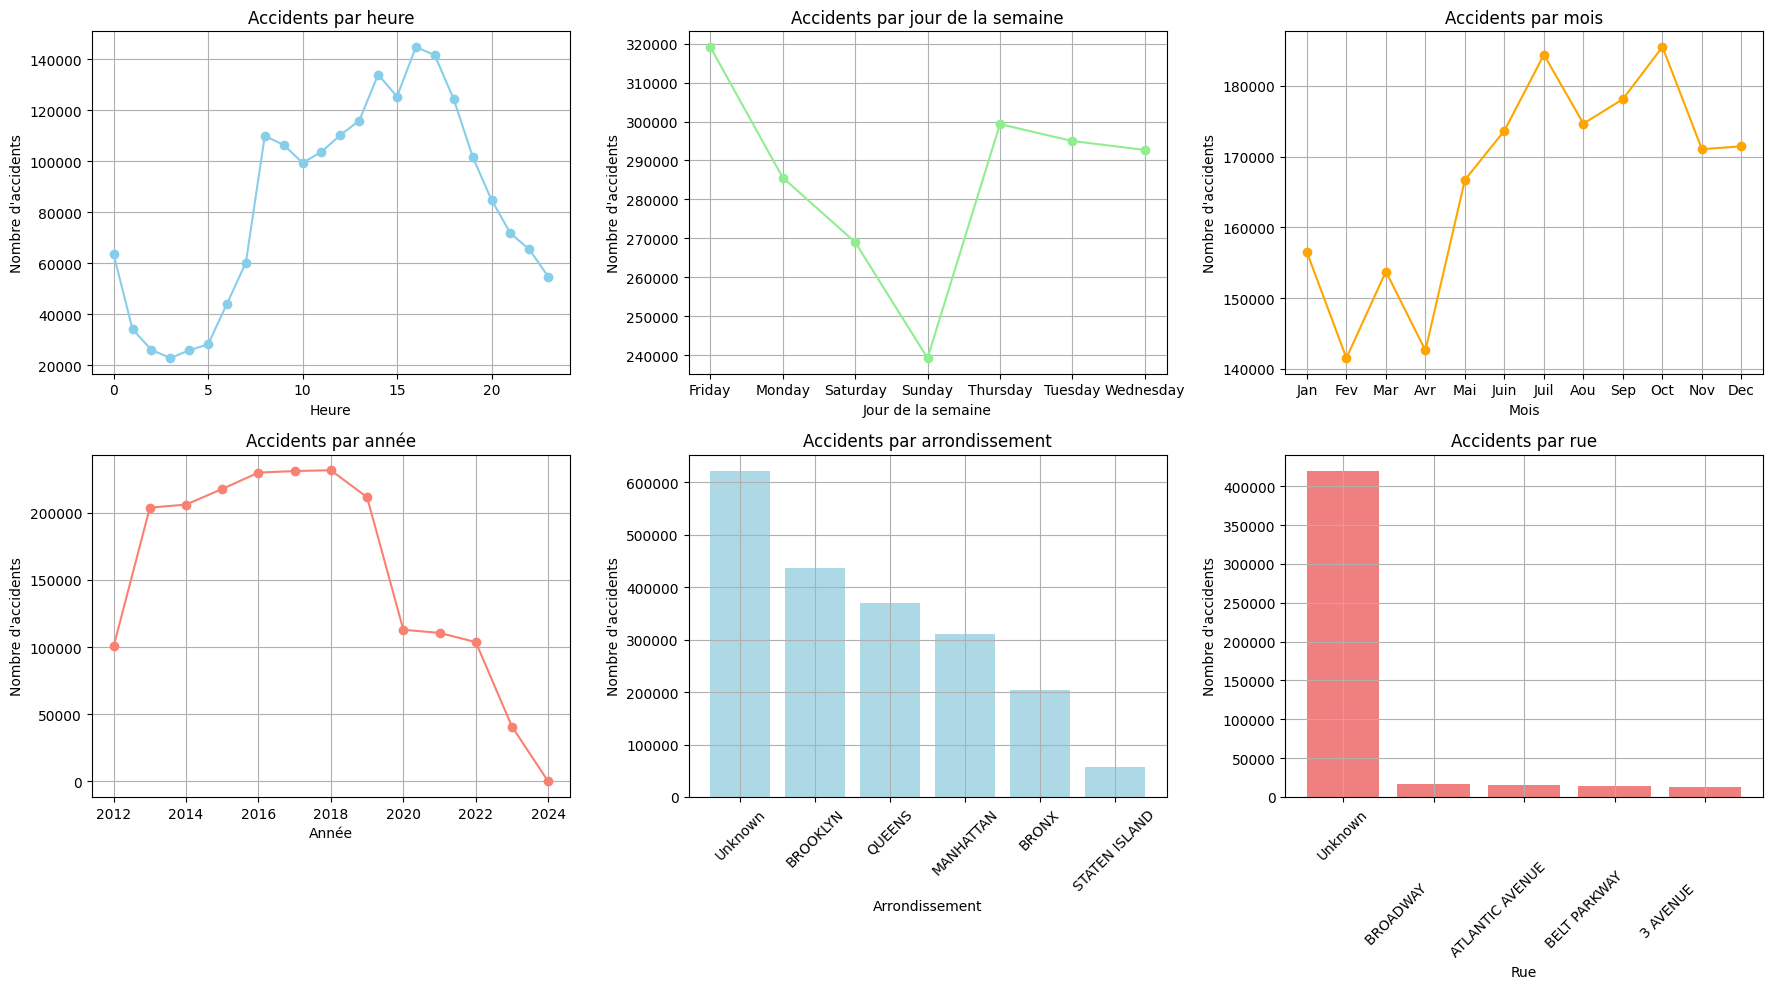

In [208]:
import calendar

# Liste des noms abrégés des mois
abrege_mois = ['Jan', 'Fev', 'Mar', 'Avr', 'Mai', 'Juin', 'Juil', 'Aou', 'Sep', 'Oct', 'Nov', 'Dec']

# Création de la grille de sous-graphiques
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Variable 'hour'
accidents_par_hour = accident_data['hour'].value_counts().sort_index()
axs[0, 0].plot(accidents_par_hour.index, accidents_par_hour.values, marker='o', color='skyblue')
axs[0, 0].set_title('Accidents par heure')
axs[0, 0].set_xlabel('Heure')
axs[0, 0].set_ylabel("Nombre d'accidents")
axs[0, 0].grid(True)

# Variable 'day_of_week'
accidents_par_day = accident_data['day_of_week'].value_counts().sort_index()
axs[0, 1].plot(accidents_par_day.index, accidents_par_day.values, marker='o', color='lightgreen')
axs[0, 1].set_title('Accidents par jour de la semaine')
axs[0, 1].set_xlabel('Jour de la semaine')
axs[0, 1].set_ylabel("Nombre d'accidents")
axs[0, 1].grid(True)

# Variable 'month'
accidents_par_month = accident_data['month'].value_counts().sort_index()
axs[0, 2].plot(abrege_mois, accidents_par_month.values, marker='o', color='orange')
axs[0, 2].set_title('Accidents par mois')
axs[0, 2].set_xlabel('Mois')
axs[0, 2].set_ylabel("Nombre d'accidents")
axs[0, 2].grid(True)

# Variable 'year'
accidents_par_year = accident_data['year'].value_counts().sort_index()
axs[1, 0].plot(accidents_par_year.index, accidents_par_year.values, marker='o', color='salmon')
axs[1, 0].set_title('Accidents par année')
axs[1, 0].set_xlabel('Année')
axs[1, 0].set_ylabel("Nombre d'accidents")
axs[1, 0].grid(True)

# Variable 'borough'
accidents_par_borough = accident_data['borough'].value_counts()
axs[1, 1].bar(accidents_par_borough.index, accidents_par_borough.values, color='lightblue')
axs[1, 1].set_title('Accidents par arrondissement')
axs[1, 1].set_xlabel('Arrondissement')
axs[1, 1].set_ylabel("Nombre d'accidents")
axs[1, 1].tick_params(axis='x', rotation=45)
axs[1, 1].grid(True)

# Variable 'on_street_name'
accidents_par_street = accident_data['on_street_name'].value_counts().head(5)  # Prend les 5 premières rues
axs[1, 2].bar(accidents_par_street.index, accidents_par_street.values, color='lightcoral')
axs[1, 2].set_title('Accidents par rue')
axs[1, 2].set_xlabel('Rue')
axs[1, 2].set_ylabel("Nombre d'accidents")
axs[1, 2].tick_params(axis='x', rotation=45)
axs[1, 2].grid(True)

# Ajustement de l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()

# **Graphique pour l'analyse Bivariée**

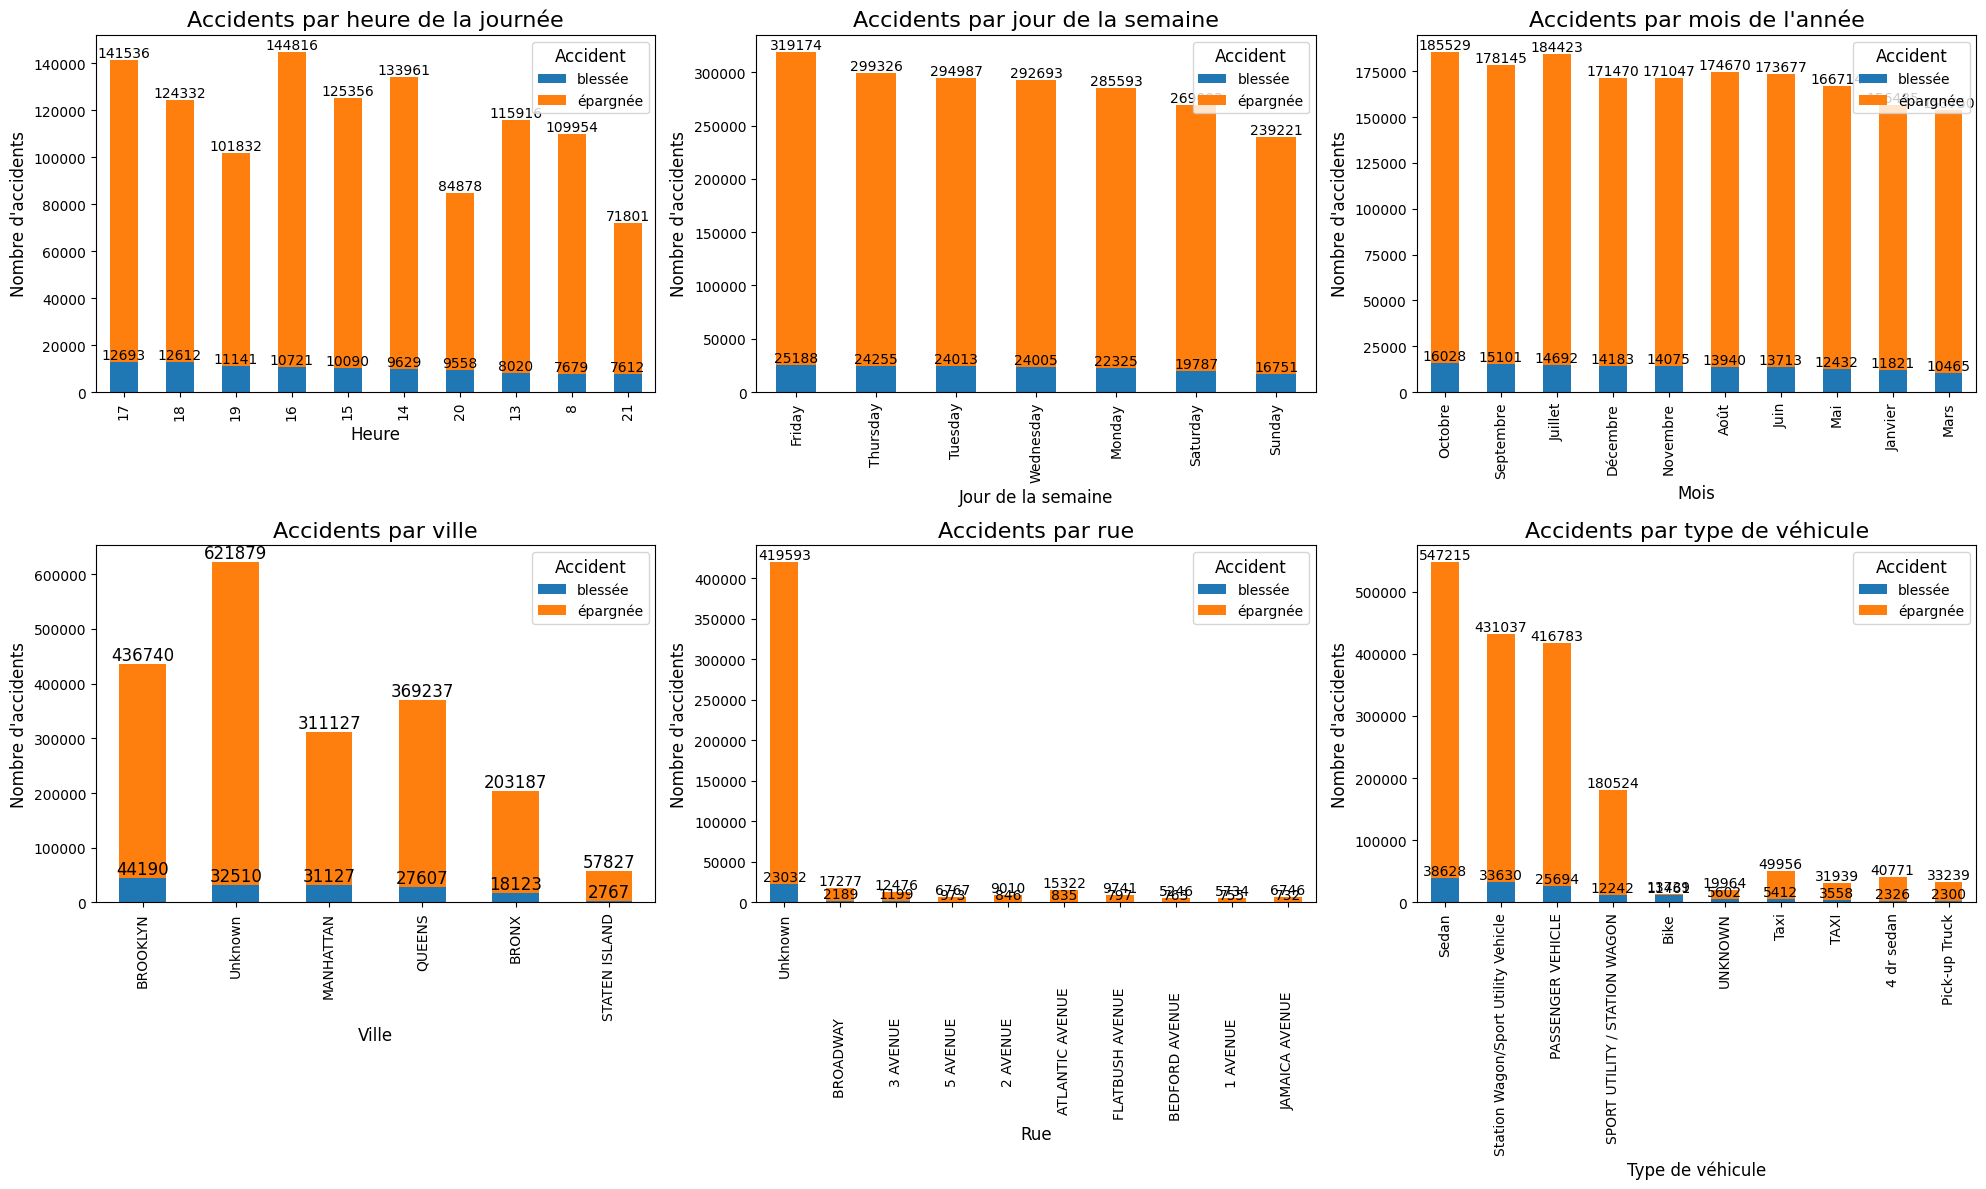

In [209]:
# Créer une figure et des sous-graphiques
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Analyse bivariée entre "Accident" et l'heure
accident_by_hour = accident_data.groupby(['hour', 'Accident']).size().unstack().nlargest(10, 'blessée')
accident_by_hour.plot(kind='bar', stacked=True, ax=axes[0, 0])
axes[0, 0].set_title('Accidents par heure de la journée', fontsize=16)
axes[0, 0].set_xlabel('Heure', fontsize=12)
axes[0, 0].set_ylabel('Nombre d\'accidents', fontsize=12)
axes[0, 0].legend(title='Accident', fontsize=10, title_fontsize='12')

# Afficher les proportions sur le graphique
for container in axes[0, 0].containers:
    axes[0, 0].bar_label(container, label_type='edge', fontsize=10)

# Analyse bivariée entre "Accident" et le jour de la semaine
accident_by_day = accident_data.groupby(['day_of_week', 'Accident']).size().unstack().nlargest(10, 'blessée')
accident_by_day.plot(kind='bar', stacked=True, ax=axes[0, 1])
axes[0, 1].set_title('Accidents par jour de la semaine', fontsize=16)
axes[0, 1].set_xlabel('Jour de la semaine', fontsize=12)
axes[0, 1].set_ylabel('Nombre d\'accidents', fontsize=12)
axes[0, 1].legend(title='Accident', fontsize=10, title_fontsize='12')

# Afficher les proportions sur le graphique
for container in axes[0, 1].containers:
    axes[0, 1].bar_label(container, label_type='edge', fontsize=10)

# Analyse bivariée entre "Accident" et le mois de l'année
month_names = ['Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet', 'Août', 'Septembre', 'Octobre', 'Novembre', 'Décembre']
accident_by_month = accident_data.groupby(['month', 'Accident']).size().unstack().nlargest(10, 'blessée')
accident_by_month.index = [month_names[i - 1] for i in accident_by_month.index]  # Convertir les indices des mois en noms de mois
accident_by_month.plot(kind='bar', stacked=True, ax=axes[0, 2])
axes[0, 2].set_title('Accidents par mois de l\'année', fontsize=16)
axes[0, 2].set_xlabel('Mois', fontsize=12)
axes[0, 2].set_ylabel('Nombre d\'accidents', fontsize=12)
axes[0, 2].legend(title='Accident', fontsize=10, title_fontsize='12')

# Afficher les proportions sur le graphique
for container in axes[0, 2].containers:
    axes[0, 2].bar_label(container, label_type='edge', fontsize=10)

# Analyse bivariée entre "Accident" et la ville
accident_by_borough = accident_data.groupby(['borough', 'Accident']).size().unstack().nlargest(10, 'blessée')
accident_by_borough.plot(kind='bar', stacked=True, ax=axes[1, 0])
axes[1, 0].set_title('Accidents par ville', fontsize=16)
axes[1, 0].set_xlabel('Ville', fontsize=12)
axes[1, 0].set_ylabel('Nombre d\'accidents', fontsize=12)
axes[1, 0].legend(title='Accident', fontsize=10, title_fontsize='12')

# Afficher les proportions sur le graphique
for container in axes[1, 0].containers:
    axes[1, 0].bar_label(container, label_type='edge', fontsize=12)

# Analyse bivariée entre "Accident" et la rue
accident_by_street = accident_data.groupby(['on_street_name', 'Accident']).size().unstack().nlargest(10, 'blessée')
accident_by_street.plot(kind='bar', stacked=True, ax=axes[1, 1])
axes[1, 1].set_title('Accidents par rue', fontsize=16)
axes[1, 1].set_xlabel('Rue', fontsize=12)
axes[1, 1].set_ylabel('Nombre d\'accidents', fontsize=12)
axes[1, 1].legend(title='Accident', fontsize=10, title_fontsize='12')

# Afficher les proportions sur le graphique
for container in axes[1, 1].containers:
    axes[1, 1].bar_label(container, label_type='edge', fontsize=10)

# Analyse bivariée entre "Accident" et le type de véhicule
accident_by_vehicle = accident_data.groupby(['vehicle_type_code1', 'Accident']).size().unstack().nlargest(10, 'blessée')
accident_by_vehicle.plot(kind='bar', stacked=True, ax=axes[1, 2])
axes[1, 2].set_title('Accidents par type de véhicule', fontsize=16)
axes[1, 2].set_xlabel('Type de véhicule', fontsize=12)
axes[1, 2].set_ylabel('Nombre d\'accidents', fontsize=12)
axes[1, 2].legend(title='Accident', fontsize=10, title_fontsize='12')

# Afficher les proportions sur le graphique
for container in axes[1, 2].containers:
    axes[1, 2].bar_label(container, label_type='edge', fontsize=10)

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher les graphiques
plt.show()

##   **IV** **<span style='color:blue;'> ANALYSE MULTIVARIEE </span>** 

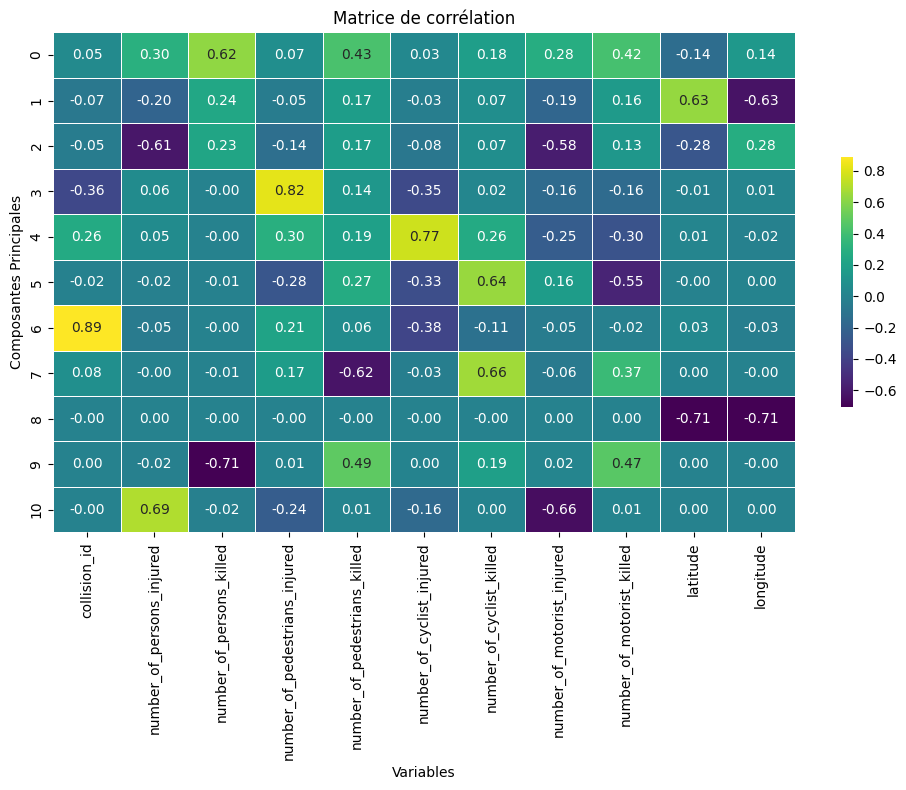

In [210]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Sélectionner uniquement les colonnes numériques dans le DataFrame
numeric_columns = accident_data.select_dtypes(include=['float64', 'int64'])

# Standardisation des données
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_columns)

# Effectuer l'Analyse en Composantes Principales (ACP)
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

# Visualiser la corrélation entre les variables sélectionnées
correlation_matrix = pd.DataFrame(pca.components_, columns=numeric_columns.columns)

# Définir une taille de figure 
plt.figure(figsize=(10, 8))

# Créer la carte de chaleur avec des annotations, une palette de couleurs et un formatage appropriés
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5, cbar_kws={"shrink": .5})

# Ajouter un titre à la carte de chaleur
plt.title('Matrice de corrélation')

# Ajouter des labels aux axes x et y
plt.xlabel('Variables')
plt.ylabel('Composantes Principales')

# Afficher la barre de couleur pour indiquer les valeurs de corrélation
colorbar = heatmap.collections[0].colorbar

# Ajuster la disposition pour éviter que les annotations ne soient tronquées
plt.tight_layout()

# Afficher la carte de chaleur
plt.show()


**Composante Principale 1** :
Cette composante principale est fortement associée aux caractéristiques liées au nombre de victimes mortelles dans les accidents de la circulation. Les variables les plus significatives sont le nombre de personnes tuées, le nombre de piétons tués et le nombre de conducteurs tués. Cela suggère que cette composante capture la gravité des accidents entraînant des pertes de vies humaines.

**Composante Principale 2** :
Cette composante principale est principalement définie par les coordonnées géographiques, la latitude et la longitude. Les poids élevés de ces deux variables indiquent que cette composante représente la localisation spatiale des accidents. Une valeur positive de latitude et une valeur négative de longitude peuvent correspondre à une localisation spécifique, et vice versa.

**Composante Principale 3** :
Cette composante principale est liée aux caractéristiques des accidents entraînant des blessures, en particulier le nombre de personnes blessées et le nombre de conducteurs blessés. Les poids élevés de ces deux variables suggèrent que cette composante capture des informations sur les accidents moins graves impliquant des blessures.

**Composante Principale 4** :
Cette composante principale est fortement associée au nombre de piétons blessés dans les accidents. Le poids élevé de la variable "number_of_pedestrians_injured" indique que cette composante capture des informations spécifiques sur les accidents impliquant des piétons blessés.

**Composante Principale 5** :
Cette composante principale est principalement définie par le nombre de cyclistes blessés dans les accidents. Cela suggère que cette composante capture des informations sur les accidents impliquant des cyclistes blessés, ce qui pourrait être utile pour les analyses de sécurité routière concernant les cyclistes.

**Composante Principale 6** :
Cette composante principale est associée au nombre de victimes cyclistes tuées et blessées, ainsi qu'au nombre de conducteurs tués. Les poids élevés de ces variables suggèrent que cette composante représente des informations sur les accidents impliquant des cyclistes, à la fois mortels et non mortels.

##   **V** **<span style='color:blue;'> LA MODELISATION </span>** 

## Distribution de la variable accident

C:\Users\pc\AppData\Local\Temp\ipykernel_3132\1273661475.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  barplot.text(i, accident_counts[i] + 10000, f'{value:.2%}', ha='center')


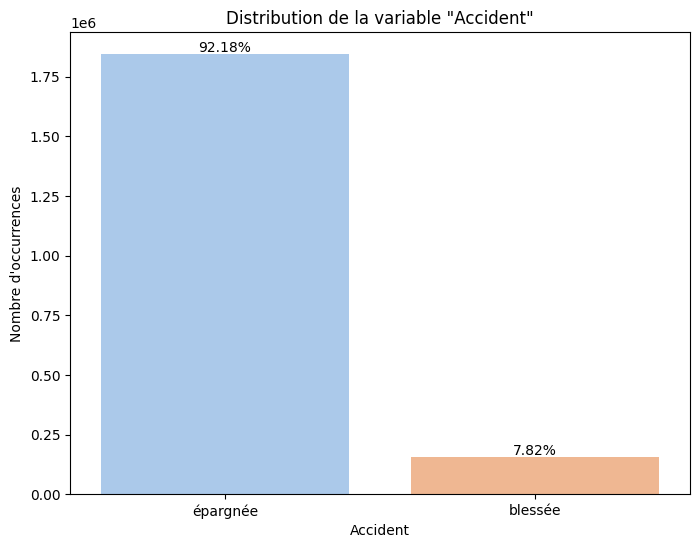

In [211]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compter les occurrences de chaque classe dans la variable 'Accident'
accident_counts = accident_data['Accident'].value_counts()

# Calculer les proportions de chaque classe
total_samples = len(accident_data)
proportions = accident_counts / total_samples

# Tracer un graphique à barres pour visualiser la distribution avec les proportions
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x=['épargnée', 'blessée'], y=accident_counts.values, palette="pastel", hue=['épargnée', 'blessée'], dodge=False)

# Annoter chaque barre avec sa proportion
for i, value in enumerate(proportions):
    barplot.text(i, accident_counts[i] + 10000, f'{value:.2%}', ha='center')

plt.title('Distribution de la variable "Accident"')
plt.xlabel('Accident')
plt.ylabel('Nombre d\'occurrences')
plt.show()

### Dans notre jeu de données, nous observons que 92,18 % des accidents n'ont pas entraîné de blessure, tandis que 7,82 % ont conduit à des blessures. Ces observations nous incitent à élaborer un modèle pour prédire si une victime sera blessée ou épargnée lors d'un accident

In [212]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

accident_data_copy = accident_data.copy()
# Binariser la colonne 'Accident' en utilisant des valeurs 0 ou 1
accident_data_copy['Accident'] = (accident_data_copy['Accident'] == 'blessée').astype(int)

# Supposons que categorical_columns est une liste de noms de colonnes catégorielles que vous avez déjà définie

# Calculer la fréquence des catégories dans chaque colonne catégorielle
for column in categorical_columns:
    frequency_mapping = accident_data_copy[column].value_counts(normalize=True).to_dict()
    accident_data_copy[column] = accident_data_copy[column].map(frequency_mapping)

# Diviser les données en ensembles d'entraînement et de test
X = accident_data_copy.drop('Accident', axis=1)
y = accident_data_copy['Accident']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertir les valeurs de y en 0 et 1
y_train_binary = y_train
y_test_binary = y_test
y_train_binary = (y_train_binary == 'blessée').astype(int)
y_test_binary = (y_test_binary == 'blessée').astype(int)

In [213]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Créer une copie de accident_data pour conserver l'original intact
accident_data_copy = accident_data.copy()

# Supprimer les colonnes non pertinentes
accident_data_copy.drop(['crash_date', 'collision_id', 'crash_time', 'on_street_name', 'location','location',"L'heure de l'accident",'hour_range'], axis=1, inplace=True)

In [214]:
# Récupérer les noms des colonnes avec des types de données catégoriels
categorical_columns = accident_data_copy.select_dtypes(include=['object']).columns.tolist()

In [215]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Binariser la colonne 'Accident' en utilisant des valeurs 0 ou 1
accident_data_copy['Accident'] = (accident_data_copy['Accident'] == 'blessée').astype(int)


# Calculer la fréquence des catégories dans chaque colonne catégorielle
for column in categorical_columns:
    frequency_mapping = accident_data_copy[column].value_counts(normalize=True).to_dict()
    accident_data_copy[column] = accident_data_copy[column].map(frequency_mapping)

# Diviser les données en ensembles d'entraînement et de test
X = accident_data_copy.drop('Accident', axis=1)
y = accident_data_copy['Accident']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertir les valeurs de y en 0 et 1
y_train_binary = y_train
y_test_binary = y_test
y_train_binary = (y_train_binary == 'blessée').astype(int)
y_test_binary = (y_test_binary == 'blessée').astype(int)

# Initialiser et entraîner le modèle XGBoost
model = XGBClassifier()
model.fit(X_train, y_train_binary)

# Faire des prédictions
y_pred = model.predict(X_test)

# Évaluer la performance du modèle
accuracy = accuracy_score(y_test_binary, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


## Notre modele semble etre parafit mais on a un risque de surapprentissage de l'echantillon train, nous allons verifier ceci dans les lignes qui vont suivre

In [216]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Diviser les données en ensembles d'entraînement, de validation et de test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42) # 60% train, 20% validation, 20% test

# Convertir les valeurs de y en 0 et 1
y_train_binary = (y_train == 'blessée').astype(int)
y_val_binary = (y_val == 'blessée').astype(int)
y_test_binary = (y_test == 'blessée').astype(int)

# Initialiser et entraîner le modèle XGBoost
model = XGBClassifier()
model.fit(X_train, y_train_binary)

# Évaluer la performance du modèle sur l'ensemble de validation
y_val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val_binary, y_val_pred)
print("Validation Accuracy:", val_accuracy)

# la performance sur l'ensemble de validation est satisfaisante, et évaluation sur l'ensemble de test
if val_accuracy > 0.8:  
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test_binary, y_test_pred)
    print("Test Accuracy:", test_accuracy)
else:
    print("Model performance on validation set not satisfactory. Try adjusting hyperparameters.")

# Convertir les valeurs de y_train_val en 0 et 1 pour la validation croisée
y_train_val_binary = (y_train_val == 'blessée').astype(int)

# Utiliser la validation croisée pour évaluer la performance du modèle
cv_scores = cross_val_score(model, X_train_val, y_train_val_binary, cv=5)  # Utilisation de la validation croisée à 5 plis
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Validation Accuracy: 1.0
Test Accuracy: 1.0
Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0


Les performances du modèle sont exceptionnelles, avec une précision parfaite de 100% à la fois sur l'ensemble de validation et l'ensemble de test, ce qui dénote une excellente capacité à généraliser sur de nouvelles données.

Nos résultats de validation croisée montrent une précision maximale sur chaque partition des données, indiquant une robustesse et une fiabilité du modèle sur des ensembles de données variés.

Les scores de précision cohérents à travers toutes les métriques évaluées témoignent de la qualité de l'apprentissage du modèle et de son aptitude à capturer les relations complexes présentes dans les données.

Ces résultats confirment la capacité du modèle à apprendre de manière exhaustive les caractéristiques des données d'entraînement, et à les généraliser avec une précision remarquable sur de nouvelles instances.

Il semble que nos donnees ont trop appris sur la base d'entrainement et n'arrive pas a faire une bonne prediction sur la base test

# **Recherche des hyperparametres**

In [217]:
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertir les valeurs de y en 0 et 1
y_train_binary = (y_train == 'blessée').astype(int)

# Définir la grille des hyperparamètres à rechercher
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1]
}

# Initialiser le modèle XGBoost
model = XGBClassifier()

# Initialiser la recherche en grille
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')

# Exécuter la recherche en grille sur les données d'entraînement
grid_search.fit(X_train, y_train_binary)

# Obtenir les meilleurs hyperparamètres
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Utiliser le modèle avec les meilleurs hyperparamètres
best_model = grid_search.best_estimator_

# Faire des prédictions sur l'ensemble de test
y_pred = best_model.predict(X_test)

# Convertir les valeurs de y_test en 0 et 1
y_test_binary = (y_test == 'blessée').astype(int)

# Évaluer la performance du modèle
accuracy = accuracy_score(y_test_binary, y_pred)
print("Accuracy:", accuracy)


Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Accuracy: 1.0


**Il semble que notre modèle soit trop complexe, ayant appris excessivement sur l'ensemble d'entraînement, ce qui entrave sa capacité à prédire efficacement sur l'ensemble de test. Pour résoudre ce problème, nous devons simplifier le modèle et introduire de nouvelles caractéristiques**

****

#   **VI**            **<span style='color:blue;'> CONCLUSION </span>**     

<div style="border: 10px solid green;padding:12px;font-size: 18px;">Après une analyse approfondie des données sur les accidents de la route, on peut deduire que les comportements négligents des conducteurs, tels que l'inattention/distraction, le non-respect des priorités et le suivi trop serré, sont des facteurs prédominants dans les accidents. Par exemple, l'inattention au volant peut inclure l'utilisation du téléphone portable pendant la conduite, comme observé dans de nombreux cas d'accidents causés par des conducteurs distraits.
Tendances temporelles et spatiales :
Certains jours de la semaine et heures de la journée présentent des taux d'accidents plus élevés. Par exemple, les données révèlent une augmentation significative des accidents les vendredis après-midi, ce qui pourrait être lié à une combinaison de fatigue accrue, de circulation intense et de comportements imprudents avant le week-end.
Impact des interventions basées sur les données : En analysant les données, il est observé qu'entre 7 heures et 9 heures du matin, ainsi qu'entre 16 heures et 18 heures les vendredis, les usagers de la route traversant les rues de Brooklyn ou de Queens présentent un risque significativement accru d'accident ou de collision avec des conducteurs inattentifs ou distraits et ceci surtout en été.</div>

 ***

<span style="font-size: 250px;">🙏</span> <span style="font-size: 250px;">🙏</span><span style="font-size: 250px;">🙏</span> <span style="font-size: 250px;">🙏</span>
